# 데이터셋 분석

### 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta
import missingno as msno

# Windows
mpl.rc("font", family='Malgun Gothic')

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 불러오기

In [2]:
parquet_path = "D:/cp2_dataset/df_cat.parquet"
df = pd.read_parquet(parquet_path)
df.head()

event_time  month  day day_name  hour event_type  product_id  \
0 2019-10-01 04:00:00+04:00     10    1  Tuesday     4       view    44600062   
1 2019-10-01 04:00:00+04:00     10    1  Tuesday     4       view     3900821   
2 2019-10-01 04:00:01+04:00     10    1  Tuesday     4       view    17200506   
3 2019-10-01 04:00:01+04:00     10    1  Tuesday     4       view     1307067   
4 2019-10-01 04:00:04+04:00     10    1  Tuesday     4       view     1004237   

           category_id                        category_code     brand  \
0  2103807459595387724                               no_cat  shiseido   
1  2053013552326770905  appliances.environment.water_heater      aqua   
2  2053013559792632471           furniture.living_room.sofa  no_brand   
3  2053013558920217191                   computers.notebook    lenovo   
4  2053013555631882655               electronics.smartphone     apple   

     price    user_id                          user_session  
0    35.79  541312140  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1    33.20  554748717  9333dfbd-b87a-4708-9857-6336556b0fcc  
2   543.10  519107250  566511c2-e2e3-422b-b695-cf8e6e792ca8  
3   251.74  550050854  7c90fc70-0e80-4590-96f3-13c02c18c713  
4  1081.98  535871217  c6bd7419-2748-4c56-95b4-8cec9ff8b80d

In [3]:
df.shape

(42448764, 13)

In [4]:
# event_type 비율 확인
print(df['event_type'].value_counts())

print(df['event_type'].value_counts(normalize=True))

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64
view        0.960673
cart        0.021827
purchase    0.017500
Name: event_type, dtype: float64


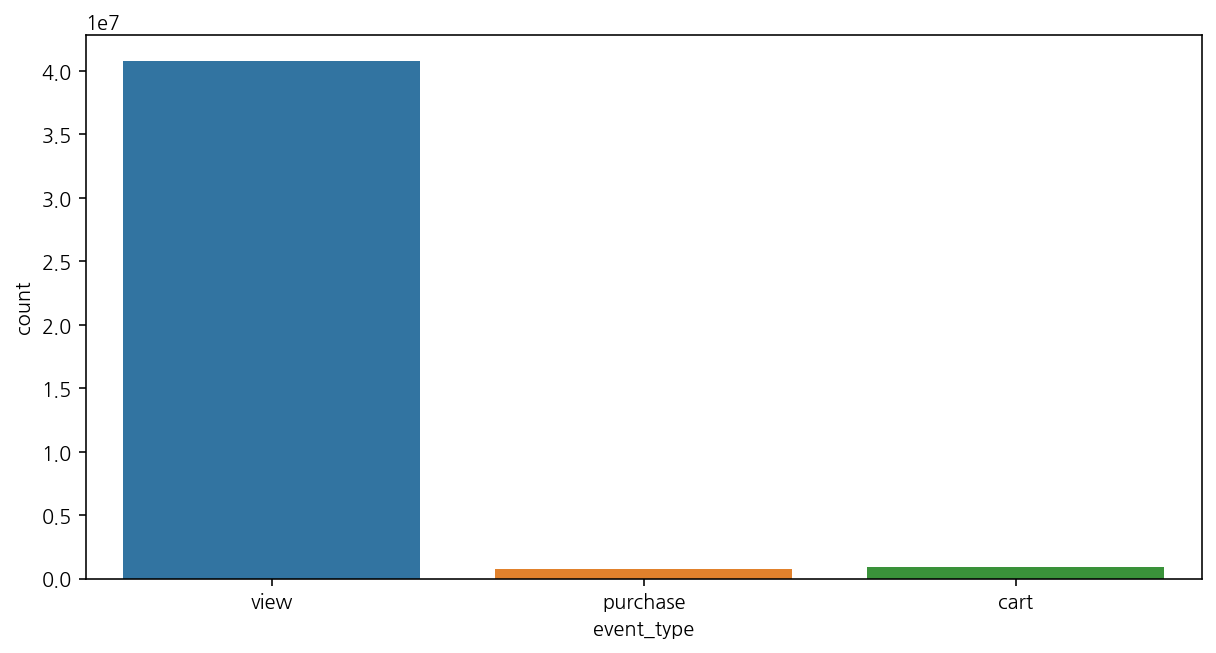

In [5]:
# event_type 분포
plt.figure(figsize=(10, 5))
cnt = sns.countplot(x=df["event_type"])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 13 columns):
 #   Column         Dtype                     
---  ------         -----                     
 0   event_time     datetime64[ns, Asia/Dubai]
 1   month          int64                     
 2   day            int64                     
 3   day_name       object                    
 4   hour           int64                     
 5   event_type     object                    
 6   product_id     int64                     
 7   category_id    int64                     
 8   category_code  object                    
 9   brand          object                    
 10  price          float64                   
 11  user_id        int64                     
 12  user_session   object                    
dtypes: datetime64[ns, Asia/Dubai](1), float64(1), int64(6), object(5)
memory usage: 4.1+ GB


## event_type 분석 

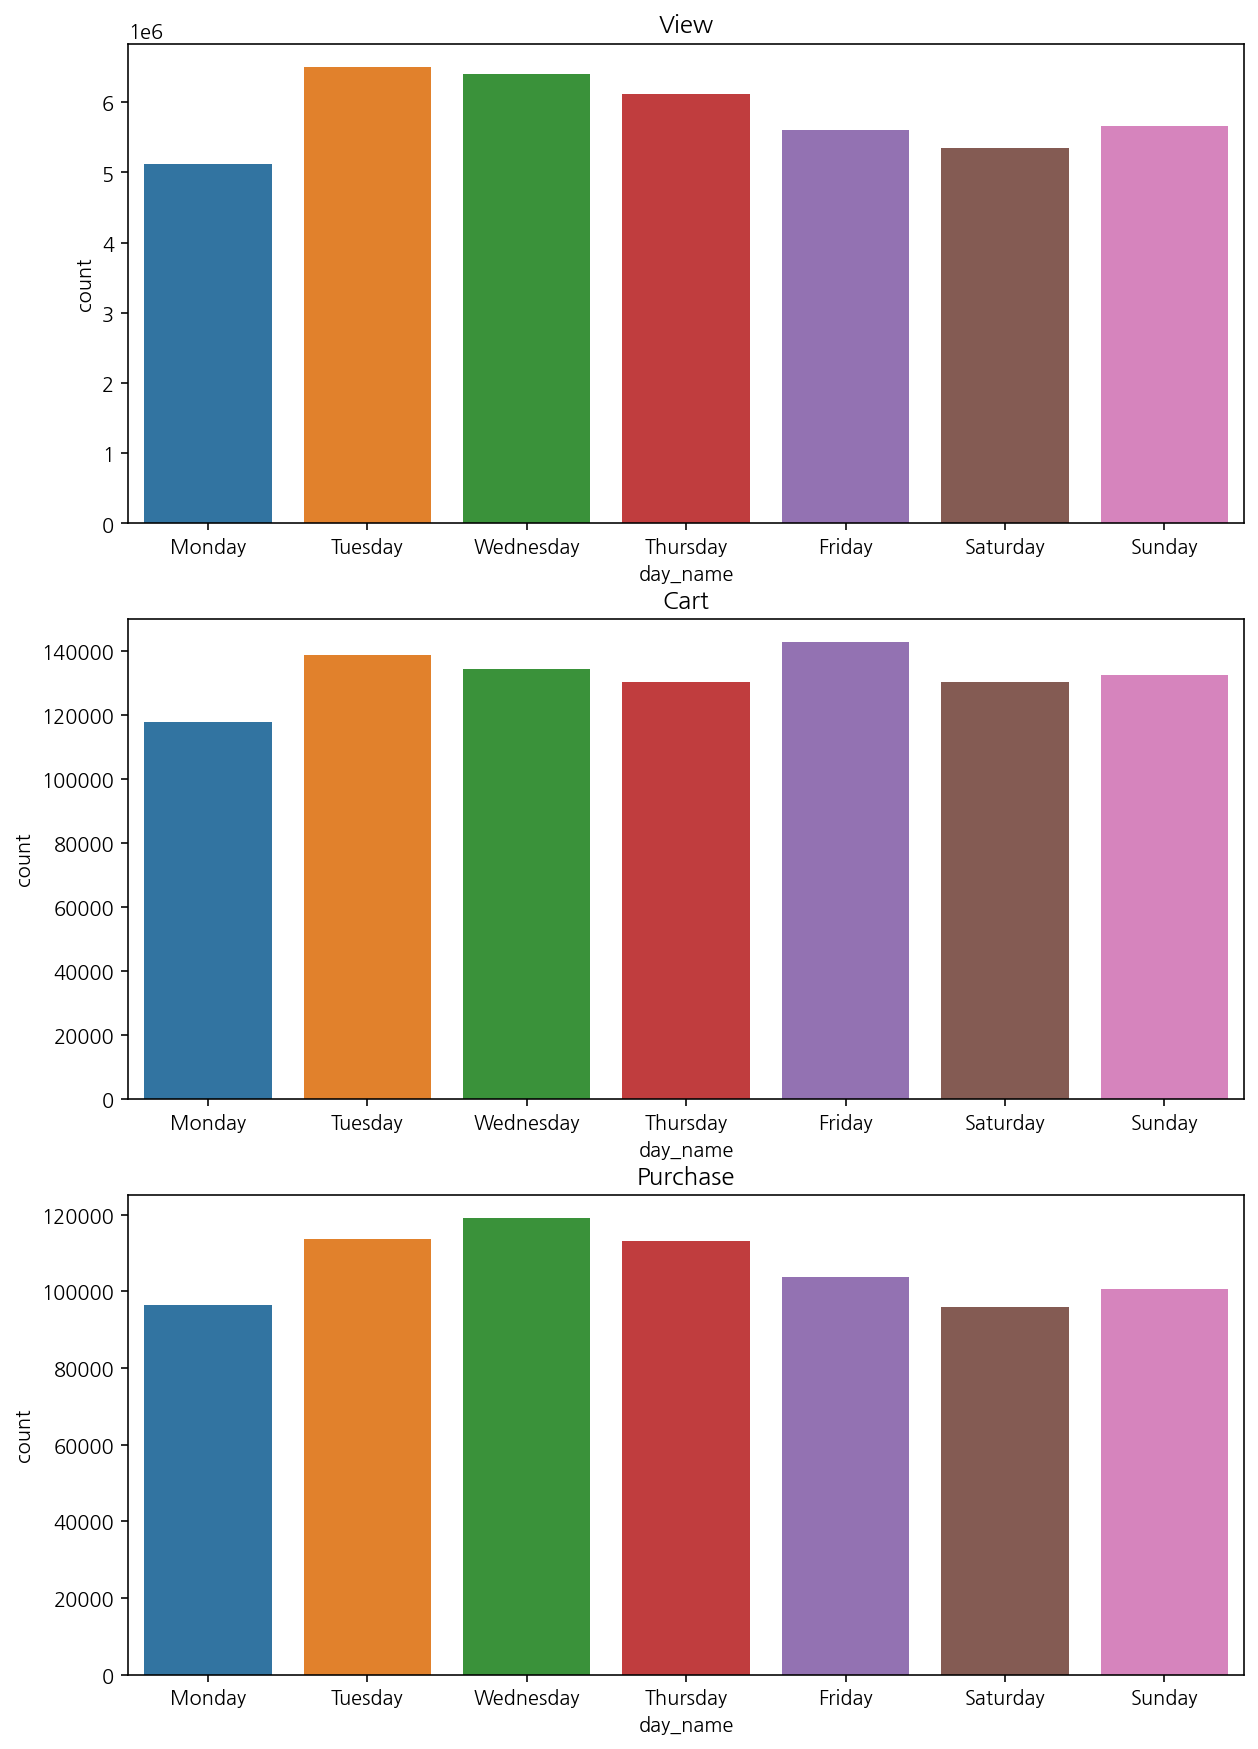

In [7]:
# 상품 클릭, 장바구니, 구매 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# 조건별로 countplot 생성
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 요일별 상품 클릭한 숫자
view_cnt = sns.countplot(x=df[view_cond]["day_name"],
                         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],              
                         ax=ax[0])
view_cnt.set_title("View")

# 요일별 장바구니에 넣은 숫자
cart_cnt = sns.countplot(x=df[cart_cond]["day_name"],
                         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                         ax=ax[1])
cart_cnt.set_title("Cart")

# 요일별 구매한 숫자
purchase_cnt = sns.countplot(x=df[purchase_cond]["day_name"],
                             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                             ax=ax[2])
purchase_cnt.set_title("Purchase")

plt.show()

### 시간대별 시각화

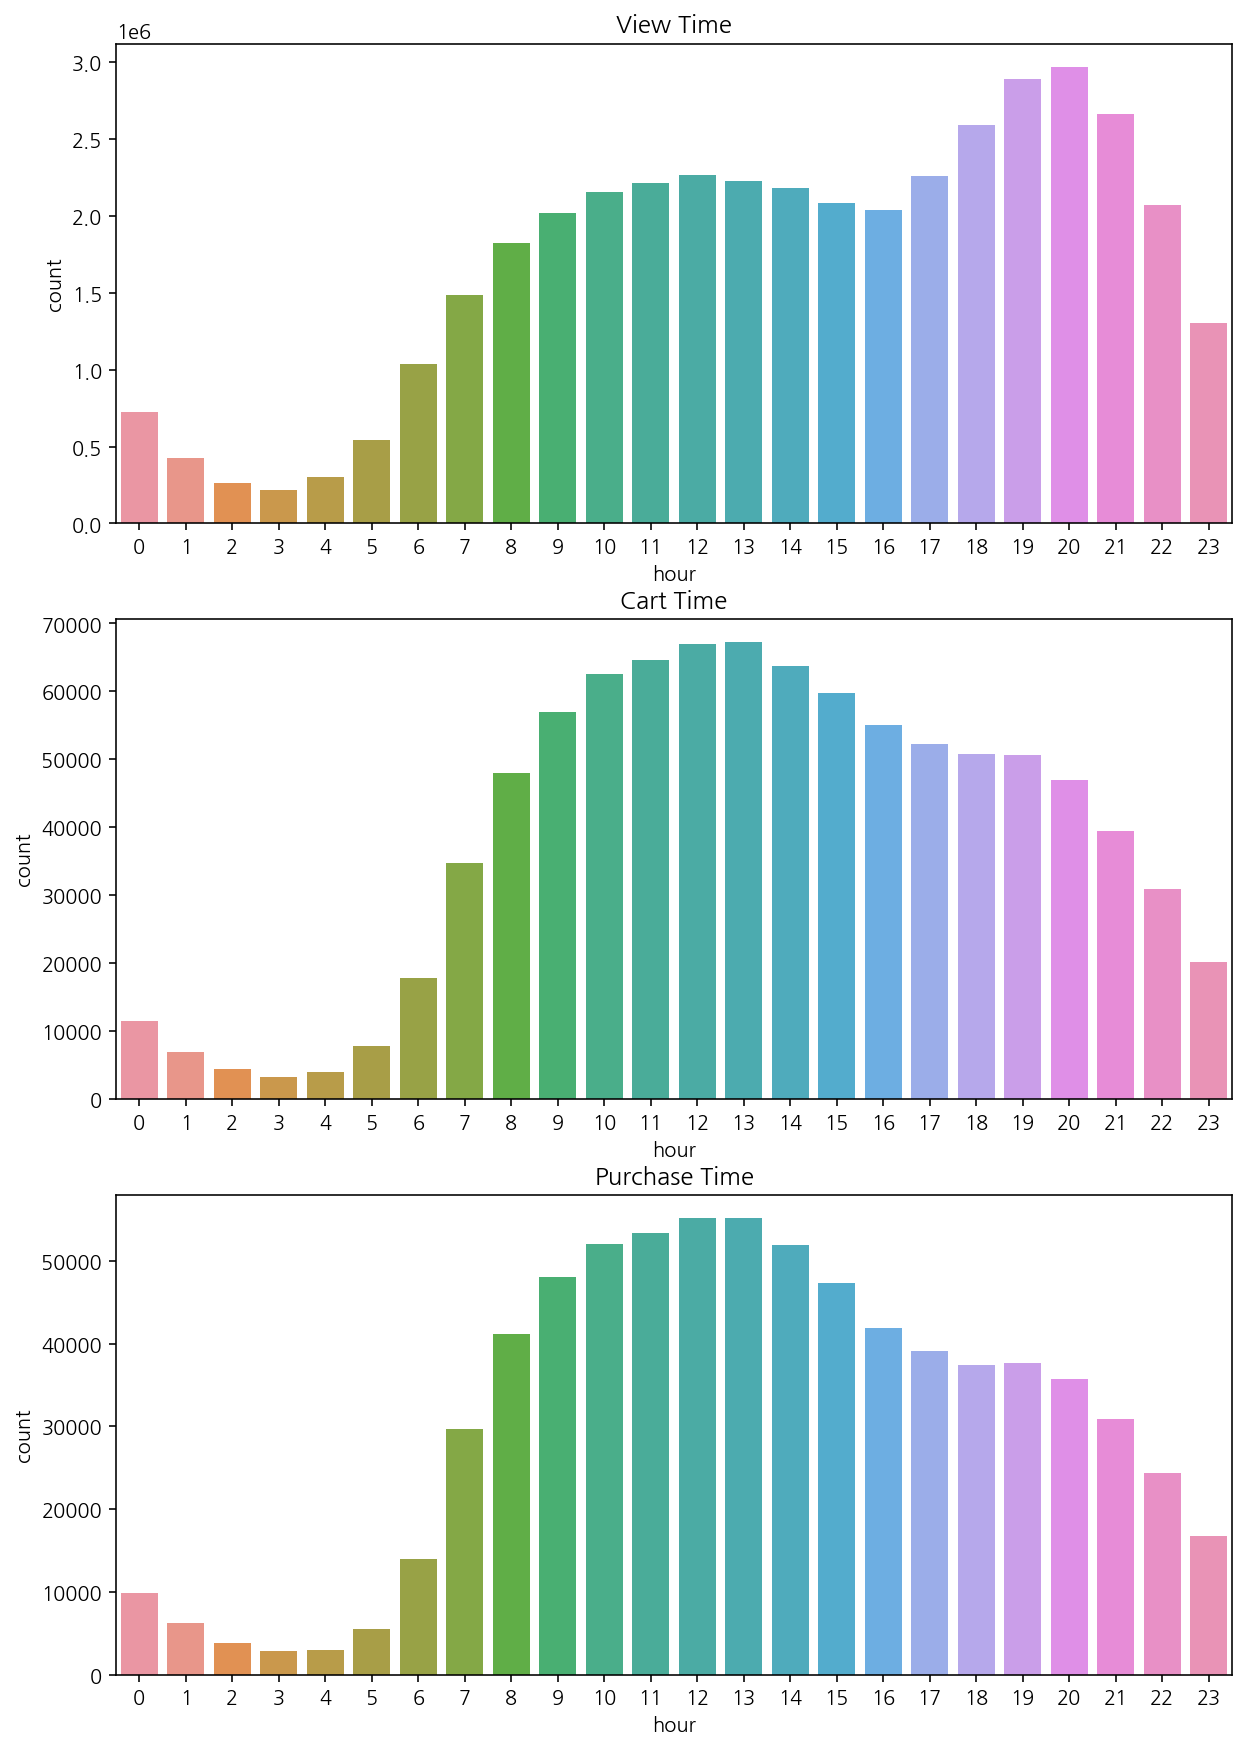

In [8]:
# 시간대별 View, Cart, Purchase

# 조건별로 countplot 생성
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 요일별 상품 클릭한 숫자
view_time_cnt = sns.countplot(x=df[view_cond]["hour"],
                              ax=ax[0])
view_time_cnt.set_title("View Time")

# 요일별 장바구니에 넣은 숫자
cart_time_cnt = sns.countplot(x=df[cart_cond]["hour"],
                         ax=ax[1])
cart_time_cnt.set_title("Cart Time")

# 요일별 구매한 숫자
purchase_time_cnt = sns.countplot(x=df[purchase_cond]["hour"],
                             ax=ax[2])
purchase_time_cnt.set_title("Purchase Time")

plt.show()

### 전체 category_code TOP 10 분석

In [9]:
# 카테고리 코드 TOP 10
df["category_code"].value_counts()[:10]

electronics.smartphone           11507231
no_cat                            3186832
auto.accessories.tire             1888744
accessories.jewelry               1676223
electronics.clocks                1632558
missing                           1521087
electronics.video.tv              1285034
computers.notebook                1137623
electronics.audio.headphone       1100188
appliances.kitchen.dishwasher     1047111
Name: category_code, dtype: int64

In [10]:
# 대분류 TOP 10
main_cat = df["category_code"].str.split(".").str[0].value_counts()[:10]
main_cat

electronics     16853504
appliances       6150611
auto             3422424
no_cat           3186832
furniture        2365596
computers        2324217
accessories      1914461
apparel          1643737
missing          1521087
construction     1425387
Name: category_code, dtype: int64

In [11]:
# 중분류 TOP 10
sub_cat_1st = df["category_code"].str.split(".").str[1].value_counts()[:10]
sub_cat_1st

smartphone     11640652
kitchen         4648890
accessories     3422424
jewelry         1676223
audio           1666325
clocks          1632558
environment     1447916
video           1298188
shoes           1208383
notebook        1137623
Name: category_code, dtype: int64

In [12]:
# 소분류 TOP 10
sub_cat_2nd = df["category_code"].str.split(".").str[2].value_counts()[:10]
sub_cat_2nd

tire             1888744
tv               1285034
headphone        1100188
dishwasher       1047111
refrigerators     887755
vacuum            801670
kit               694553
player            470208
set               466987
cooker            457909
Name: category_code, dtype: int64

In [13]:
# 브랜드 TOP 10
brand_top10 = df["brand"].value_counts()[:10]
brand_top10

samsung     5282775
no_brand    4595993
apple       4122554
xiaomi      3083763
missing     1521087
huawei      1111205
lucente      655861
lg           562404
bosch        557090
oppo         482887
Name: brand, dtype: int64

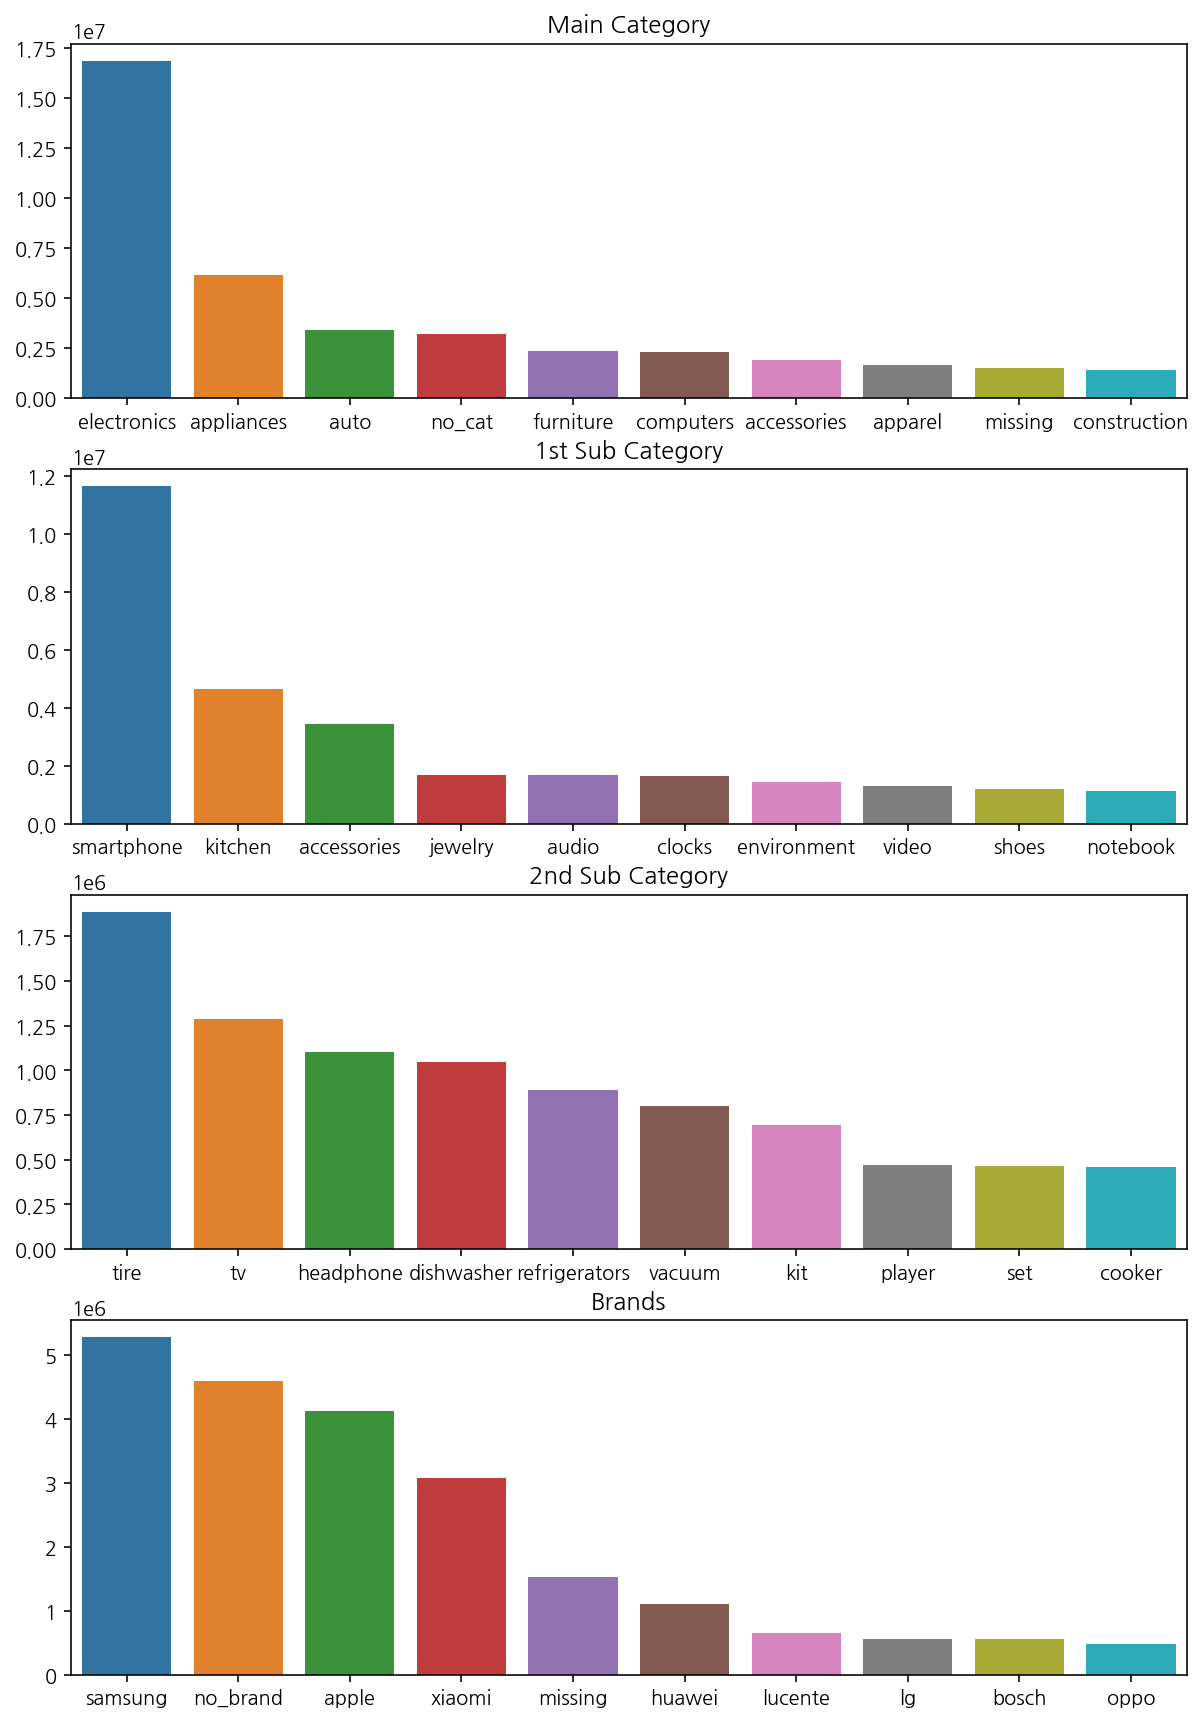

In [14]:
# 카테고리별 TOP 10 (대분류, 중분류, 소분류), 브랜드 TOP 10

# 조건별로 plot 생성
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

# 메인 카테고리 (대분류) Top 10
main_bar = sns.barplot(x=main_cat.index, 
                       y=main_cat.values,
                       ax=ax[0])
main_bar.set_title("Main Category")

# 중분류 Top 10
sub_1st_bar = sns.barplot(x=sub_cat_1st.index,
                          y=sub_cat_1st.values,
                          ax=ax[1])
sub_1st_bar.set_title("1st Sub Category")

# 소분류 Top 10
sub_2nd_bar = sns.barplot(x=sub_cat_2nd.index,
                          y=sub_cat_2nd.values,
                          ax=ax[2])
sub_2nd_bar.set_title("2nd Sub Category")

# 브랜드 Top 10
brand_bar = sns.barplot(x=brand_top10.index,
                        y=brand_top10.values,
                        ax=ax[3])
brand_bar.set_title("Brands")

plt.show()

## Category_code 기준 event_type 분석

count top 10

In [15]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase category_code TOP 10 검색
view_cat_count = df[view_cond]["category_code"].value_counts().head(10)
cart_cat_count = df[cart_cond]["category_code"].value_counts().head(10)
purchase_cat_count = df[purchase_cond]["category_code"].value_counts().head(10)

# view, cart, purchase category_code TOP 10 데이터프레임 생성
view_cat_df = pd.DataFrame(view_cat_count)
cart_cat_df = pd.DataFrame(cart_cat_count)
purchase_cat_df = pd.DataFrame(purchase_cat_count)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_cat_df.reset_index(inplace=True)
view_cat_df.columns = ["view_category", "view_counts"]
view_cat_df["view_cnt_pct"] = view_cat_df["view_counts"].apply(lambda x : round(x / df[view_cond].shape[0], 2))

cart_cat_df.reset_index(inplace=True)
cart_cat_df.columns = ["cart_category", "cart_counts"]
cart_cat_df["cart_cnt_pct"] = cart_cat_df["cart_counts"].apply(lambda x : round(x / df[cart_cond].shape[0], 2))

purchase_cat_df.reset_index(inplace=True)
purchase_cat_df.columns = ["purchase_category", "purchase_counts"]
purchase_cat_df["purchase_cnt_pct"] = purchase_cat_df["purchase_counts"].apply(lambda x : round(x / df[purchase_cond].shape[0], 2))

# view, cart, purchase category_code TOP 10 데이터프레임 결합
vcp_top_10 = pd.concat([pd.concat([view_cat_df, cart_cat_df], axis=1), purchase_cat_df], axis=1)
vcp_top_10

view_category  view_counts  view_cnt_pct  \
0         electronics.smartphone     10619448          0.26   
1                         no_cat      3135201          0.08   
2          auto.accessories.tire      1823852          0.04   
3            accessories.jewelry      1651840          0.04   
4             electronics.clocks      1565747          0.04   
5                        missing      1501024          0.04   
6           electronics.video.tv      1218126          0.03   
7             computers.notebook      1106406          0.03   
8    electronics.audio.headphone      1018542          0.02   
9  appliances.kitchen.dishwasher      1005476          0.02   

                      cart_category  cart_counts  cart_cnt_pct  \
0            electronics.smartphone       549765          0.59   
1       electronics.audio.headphone        51143          0.06   
2              electronics.video.tv        41667          0.04   
3                electronics.clocks        40295          0.04   
4     appliances.kitchen.dishwasher        24112          0.03   
5                            no_cat        22801          0.02   
6             auto.accessories.tire        20873          0.02   
7     appliances.environment.vacuum        17263          0.02   
8                computers.notebook        15627          0.02   
9  appliances.kitchen.refrigerators        13126          0.01   

               purchase_category  purchase_counts  purchase_cnt_pct  
0         electronics.smartphone           338018              0.46  
1          auto.accessories.tire            44019              0.06  
2    electronics.audio.headphone            30503              0.04  
3                         no_cat            28830              0.04  
4             electronics.clocks            26516              0.04  
5           electronics.video.tv            25241              0.03  
6            accessories.jewelry            24383              0.03  
7  appliances.kitchen.dishwasher            17523              0.02  
8             computers.notebook            15590              0.02  
9                        missing            14349              0.02

price top 10

In [16]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase category_code TOP 10 검색
view_cat_price = df[view_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)
cart_cat_price = df[cart_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)
purchase_cat_price = df[purchase_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)

# view, cart, purchase category_code TOP 10 데이터프레임 생성
view_cat_price_df = pd.DataFrame(view_cat_price)
cart_cat_price_df = pd.DataFrame(cart_cat_price)
purchase_cat_price_df = pd.DataFrame(purchase_cat_price)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_cat_price_df.reset_index(inplace=True)
view_cat_price_df.columns = ["view_category", "view_price"]
view_cat_price_df["view_cnt_pct"] = view_cat_price_df["view_price"].apply(lambda x : round(x / sum(df[view_cond]["price"]), 2))

cart_cat_price_df.reset_index(inplace=True)
cart_cat_price_df.columns = ["cart_category", "cart_price"]
cart_cat_price_df["cart_cnt_pct"] = cart_cat_price_df["cart_price"].apply(lambda x : round(x / sum(df[cart_cond]["price"]), 2))

purchase_cat_price_df.reset_index(inplace=True)
purchase_cat_price_df.columns = ["purchase_category", "purchase_price"]
purchase_cat_price_df["purchase_cnt_pct"] = purchase_cat_price_df["purchase_price"].apply(lambda x : round(x / sum(df[purchase_cond]["price"]), 2))

# view, cart, purchase category_code TOP 10 데이터프레임 결합
vcp_top_pr_10 = pd.concat([pd.concat([view_cat_price_df, cart_cat_price_df], axis=1), purchase_cat_price_df], axis=1)
vcp_top_pr_10

view_category    view_price  view_cnt_pct  \
0            electronics.smartphone  5.038426e+09          0.43   
1                computers.notebook  7.907289e+08          0.07   
2                            no_cat  6.058913e+08          0.05   
3              electronics.video.tv  5.341822e+08          0.05   
4               accessories.jewelry  4.125639e+08          0.04   
5                electronics.clocks  3.852238e+08          0.03   
6  appliances.kitchen.refrigerators  3.435288e+08          0.03   
7     appliances.kitchen.dishwasher  3.312953e+08          0.03   
8             furniture.bedroom.set  2.627793e+08          0.02   
9                 computers.desktop  2.253139e+08          0.02   

                      cart_category    cart_price  cart_cnt_pct  \
0            electronics.smartphone  2.353282e+08          0.76   
1              electronics.video.tv  1.650678e+07          0.05   
2                computers.notebook  9.548366e+06          0.03   
3     appliances.kitchen.dishwasher  7.438016e+06          0.02   
4                electronics.clocks  7.041961e+06          0.02   
5       electronics.audio.headphone  5.967964e+06          0.02   
6  appliances.kitchen.refrigerators  5.089855e+06          0.02   
7     appliances.environment.vacuum  2.516269e+06          0.01   
8                            no_cat  2.244009e+06          0.01   
9                electronics.tablet  2.184213e+06          0.01   

                  purchase_category  purchase_price  purchase_cnt_pct  
0            electronics.smartphone    1.570496e+08              0.68  
1              electronics.video.tv    9.896322e+06              0.04  
2                computers.notebook    8.979887e+06              0.04  
3               accessories.jewelry    5.739242e+06              0.02  
4                electronics.clocks    5.076168e+06              0.02  
5     appliances.kitchen.dishwasher    5.075204e+06              0.02  
6  appliances.kitchen.refrigerators    3.830077e+06              0.02  
7                            no_cat    3.767586e+06              0.02  
8       electronics.audio.headphone    3.539127e+06              0.02  
9             auto.accessories.tire    2.925240e+06              0.01

## Brand 기준 event_type 분석

count top 10

In [17]:
# view, cart, purchase brand TOP 10 검색
view_br_count = df[view_cond]["brand"].value_counts().head(10)
cart_br_count = df[cart_cond]["brand"].value_counts().head(10)
purchase_br_count = df[purchase_cond]["brand"].value_counts().head(10)

# view, cart, purchase brand TOP 10 데이터프레임 생성
view_br_df = pd.DataFrame(view_br_count)
cart_br_df = pd.DataFrame(cart_br_count)
purchase_br_df = pd.DataFrame(purchase_br_count)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_br_df.reset_index(inplace=True)
view_br_df.columns = ["view_brand", "view_counts"]
view_br_df["view_cnt_pct"] = view_br_df["view_counts"].apply(lambda x : round(x / df[view_cond].shape[0], 2))

cart_br_df.reset_index(inplace=True)
cart_br_df.columns = ["cart_brand", "cart_counts"]
cart_br_df["cart_cnt_pct"] = cart_br_df["cart_counts"].apply(lambda x : round(x / df[cart_cond].shape[0], 2))

purchase_br_df.reset_index(inplace=True)
purchase_br_df.columns = ["purchase_brand", "purchase_counts"]
purchase_br_df["purchase_cnt_pct"] = purchase_br_df["purchase_counts"].apply(lambda x : round(x / df[purchase_cond].shape[0], 2))

# view, cart, purchase brand TOP 10 데이터프레임 결합
pd.concat([pd.concat([view_br_df, cart_br_df], axis=1), purchase_br_df], axis=1)

view_brand  view_counts  view_cnt_pct cart_brand  cart_counts  cart_cnt_pct  \
0    samsung      4806630          0.12    samsung       303249          0.33   
1   no_brand      4538945          0.11      apple       209084          0.23   
2      apple      3770597          0.09     xiaomi       104497          0.11   
3     xiaomi      2922650          0.07     huawei        42132          0.05   
4    missing      1501024          0.04       oppo        20547          0.02   
5     huawei      1045572          0.03         lg        13546          0.01   
6    lucente       644283          0.02   no_brand        13092          0.01   
7      bosch       544230          0.01       sony        10060          0.01   
8         lg       540131          0.01       acer         9400          0.01   
9       oppo       451449          0.01   elenberg         8598          0.01   

  purchase_brand  purchase_counts  purchase_cnt_pct  
0        samsung           172896              0.23  
1          apple           142873              0.19  
2         xiaomi            56616              0.08  
3       no_brand            43956              0.06  
4         huawei            23501              0.03  
5        missing            14349              0.02  
6        lucente            11578              0.02  
7           oppo            10891              0.01  
8       cordiant            10551              0.01  
9             lg             8727              0.01

price top 10

In [18]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase brand TOP 10 검색
view_br_price = df[view_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)
cart_br_price = df[cart_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)
purchase_br_price = df[purchase_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)

# view, cart, purchase brand TOP 10 데이터프레임 생성
view_br_price_df = pd.DataFrame(view_br_price)
cart_br_price_df = pd.DataFrame(cart_br_price)
purchase_br_price_df = pd.DataFrame(purchase_br_price)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_br_price_df.reset_index(inplace=True)
view_br_price_df.columns = ["view_brand", "view_price"]
view_br_price_df["view_br_pct"] = view_br_price_df["view_price"].apply(lambda x : round(x / sum(df[view_cond]["price"]), 2))

cart_br_price_df.reset_index(inplace=True)
cart_br_price_df.columns = ["cart_brand", "cart_price"]
cart_br_price_df["cart_br_pct"] = cart_br_price_df["cart_price"].apply(lambda x : round(x / sum(df[cart_cond]["price"]), 2))

purchase_br_price_df.reset_index(inplace=True)
purchase_br_price_df.columns = ["purchase_brand", "purchase_price"]
purchase_br_price_df["purchase_br_pct"] = purchase_br_price_df["purchase_price"].apply(lambda x : round(x / sum(df[purchase_cond]["price"]), 2))

# view, cart, purchase brand TOP 10 데이터프레임 결합
pd.concat([pd.concat([view_br_price_df, cart_br_price_df], axis=1), purchase_br_price_df], axis=1)

view_brand    view_price  view_br_pct cart_brand    cart_price  cart_br_pct  \
0      apple  3.161047e+09         0.27      apple  1.584484e+08         0.51   
1    samsung  1.621074e+09         0.14    samsung  7.755515e+07         0.25   
2   no_brand  9.967721e+08         0.08     xiaomi  1.518250e+07         0.05   
3     xiaomi  5.937899e+08         0.05     huawei  8.728023e+06         0.03   
4     huawei  2.803897e+08         0.02         lg  5.268456e+06         0.02   
5       acer  2.499201e+08         0.02       acer  5.146042e+06         0.02   
6         lg  2.453203e+08         0.02       oppo  4.570270e+06         0.01   
7    missing  1.971024e+08         0.02       sony  3.554085e+06         0.01   
8       sony  1.854459e+08         0.02      bosch  1.812514e+06         0.01   
9     lenovo  1.781558e+08         0.02    indesit  1.734906e+06         0.01   

  purchase_brand  purchase_price  purchase_br_pct  
0          apple    1.112093e+08             0.48  
1        samsung    4.640753e+07             0.20  
2         xiaomi    9.194033e+06             0.04  
3       no_brand    7.573956e+06             0.03  
4         huawei    4.883422e+06             0.02  
5           acer    3.576720e+06             0.02  
6             lg    3.387888e+06             0.01  
7        lucente    3.124113e+06             0.01  
8           sony    2.478197e+06             0.01  
9           oppo    2.412960e+06             0.01

# 구매전환율 (CVR, Conversion Rate) 구하기

광고를 클릭하여 사이트에 들어온 방문자가 실제 구매 활동회원가입, 구매, 장바구니담기 등 광고주가 원하는 특정 행위을 하는 비율.

구매전환율 = 전환수(구매횟수)/클릭수*100

In [19]:
df_heat = df.copy()
# df_heat['event_time'] =  df_heat['event_time'].dt.to_period('D')

df_view_cvr = df_heat.loc[df_heat['event_type']=='view']
df_view_cvr = df_view_cvr[['event_time','user_session','price']]

df_pur_cvr = df_heat.loc[df_heat['event_type']=='purchase']
df_pur_cvr = df_pur_cvr[['event_time','user_session','price']]

In [20]:
# view
df_date_view = df_view_cvr.groupby('event_time').count().reset_index()
# purchase
df_date_purchase = df_pur_cvr.groupby('event_time').count().reset_index()

# merge
df_cvr = pd.merge(df_date_view,df_date_purchase, on='event_time')


# cvr 컬럼추가
df_cvr['CVR'] = df_cvr['user_session_y']/df_cvr['user_session_x'] *100

In [21]:
# 일별 매출
df_day_purchase = df_heat.loc[df_heat['event_type']=='purchase']
df_day_purchase['event_time'] =  df_day_purchase['event_time']

df_day_purchase = df_day_purchase[['event_time','price']]
df_day_purchase = df_day_purchase.groupby('event_time').sum().reset_index()

# merge

df_cvr = pd.merge(df_cvr,df_day_purchase, on='event_time')

df_cvr['weekday'] = df_cvr['event_time'].dt.weekday
df_cvr

event_time  user_session_x  price_x  user_session_y  \
0      2019-10-01 04:02:14+04:00               1        1               1   
1      2019-10-01 04:04:37+04:00               1        1               1   
2      2019-10-01 04:06:02+04:00               2        2               1   
3      2019-10-01 04:07:07+04:00               1        1               1   
4      2019-10-01 04:09:54+04:00               2        2               1   
...                          ...             ...      ...             ...   
615864 2019-11-01 03:55:13+04:00               4        4               1   
615865 2019-11-01 03:55:21+04:00               3        3               1   
615866 2019-11-01 03:56:03+04:00               2        2               1   
615867 2019-11-01 03:56:53+04:00               1        1               1   
615868 2019-11-01 03:59:16+04:00               4        4               1   

        price_y         CVR    price  weekday  
0             1  100.000000   130.76        1  
1             1  100.000000   642.69        1  
2             1   50.000000    29.51        1  
3             1  100.000000    54.42        1  
4             1   50.000000   161.98        1  
...         ...         ...      ...      ...  
615864        1   25.000000   102.45        4  
615865        1   33.333333    20.59        4  
615866        1   50.000000   577.89        4  
615867        1  100.000000  1054.60        4  
615868        1   25.000000   160.57        4  

[615869 rows x 8 columns]

일일 매출, CVR 시각화

Text(0.5, 1.0, 'Daily CVR')

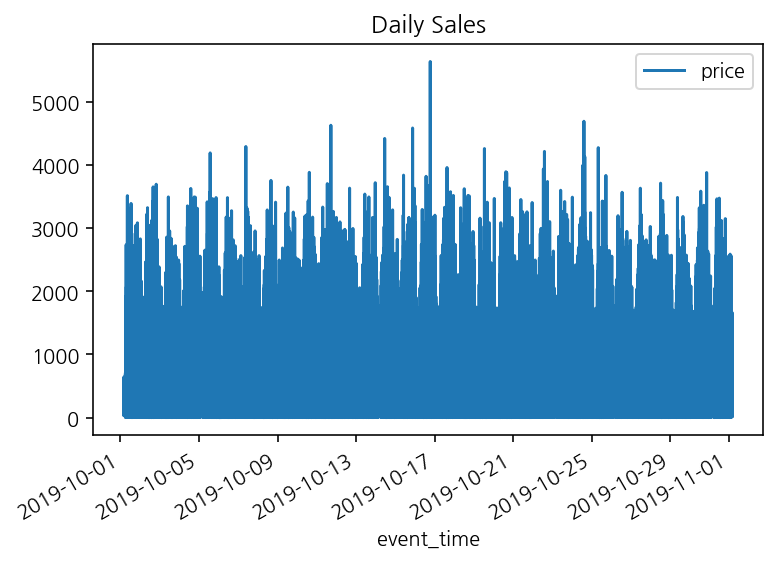

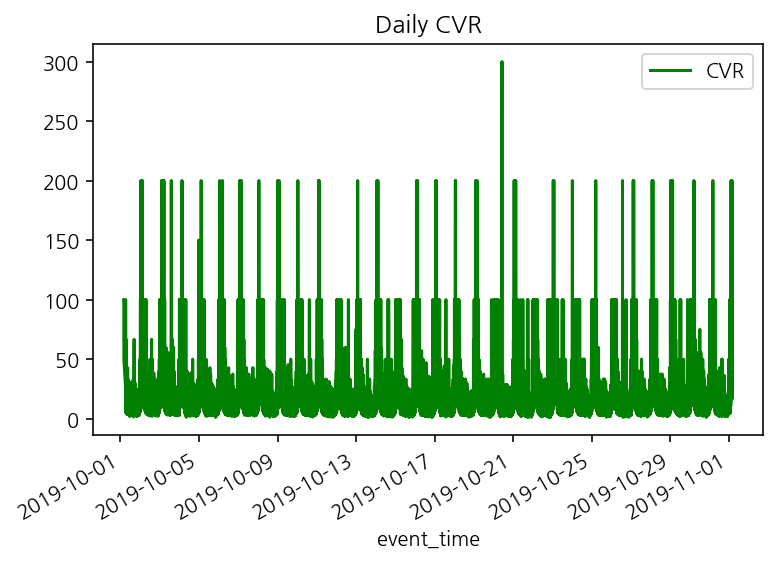

In [22]:
# 일일 매출, CVR 시각화

sales_line = df_cvr.plot(x="event_time", y="price")
sales_line.set_title("Daily Sales")

cvr_line = df_cvr.plot(x="event_time", y="CVR", color="green")
cvr_line.set_title("Daily CVR")

# 요일별 구매 시간대 히트맵 구현

In [23]:
# 구매한 데이터들만 따로 df_pur에 선언
purchase_cond = (df["event_type"] == "purchase")
df_pur = df.loc[purchase_cond]

# event_time열 period 타입으로 변경
df_pur["event_time"] = df_pur["event_time"].dt.to_period("H")
# event_time으로 groupby한 후 전부 더해준다
df_pur = df_pur.groupby("event_time").sum().reset_index()

df_pur["day"] = df_pur["event_time"].dt.day
df_pur["hour"] = df_pur["event_time"].dt.hour

pur_columns = ["event_time", "day", "hour", "price"]
df_pur = df_pur[pur_columns].reset_index(drop=True)

In [24]:
df_pur_pivot = df_pur.pivot_table(values="price", index="day", columns="hour")

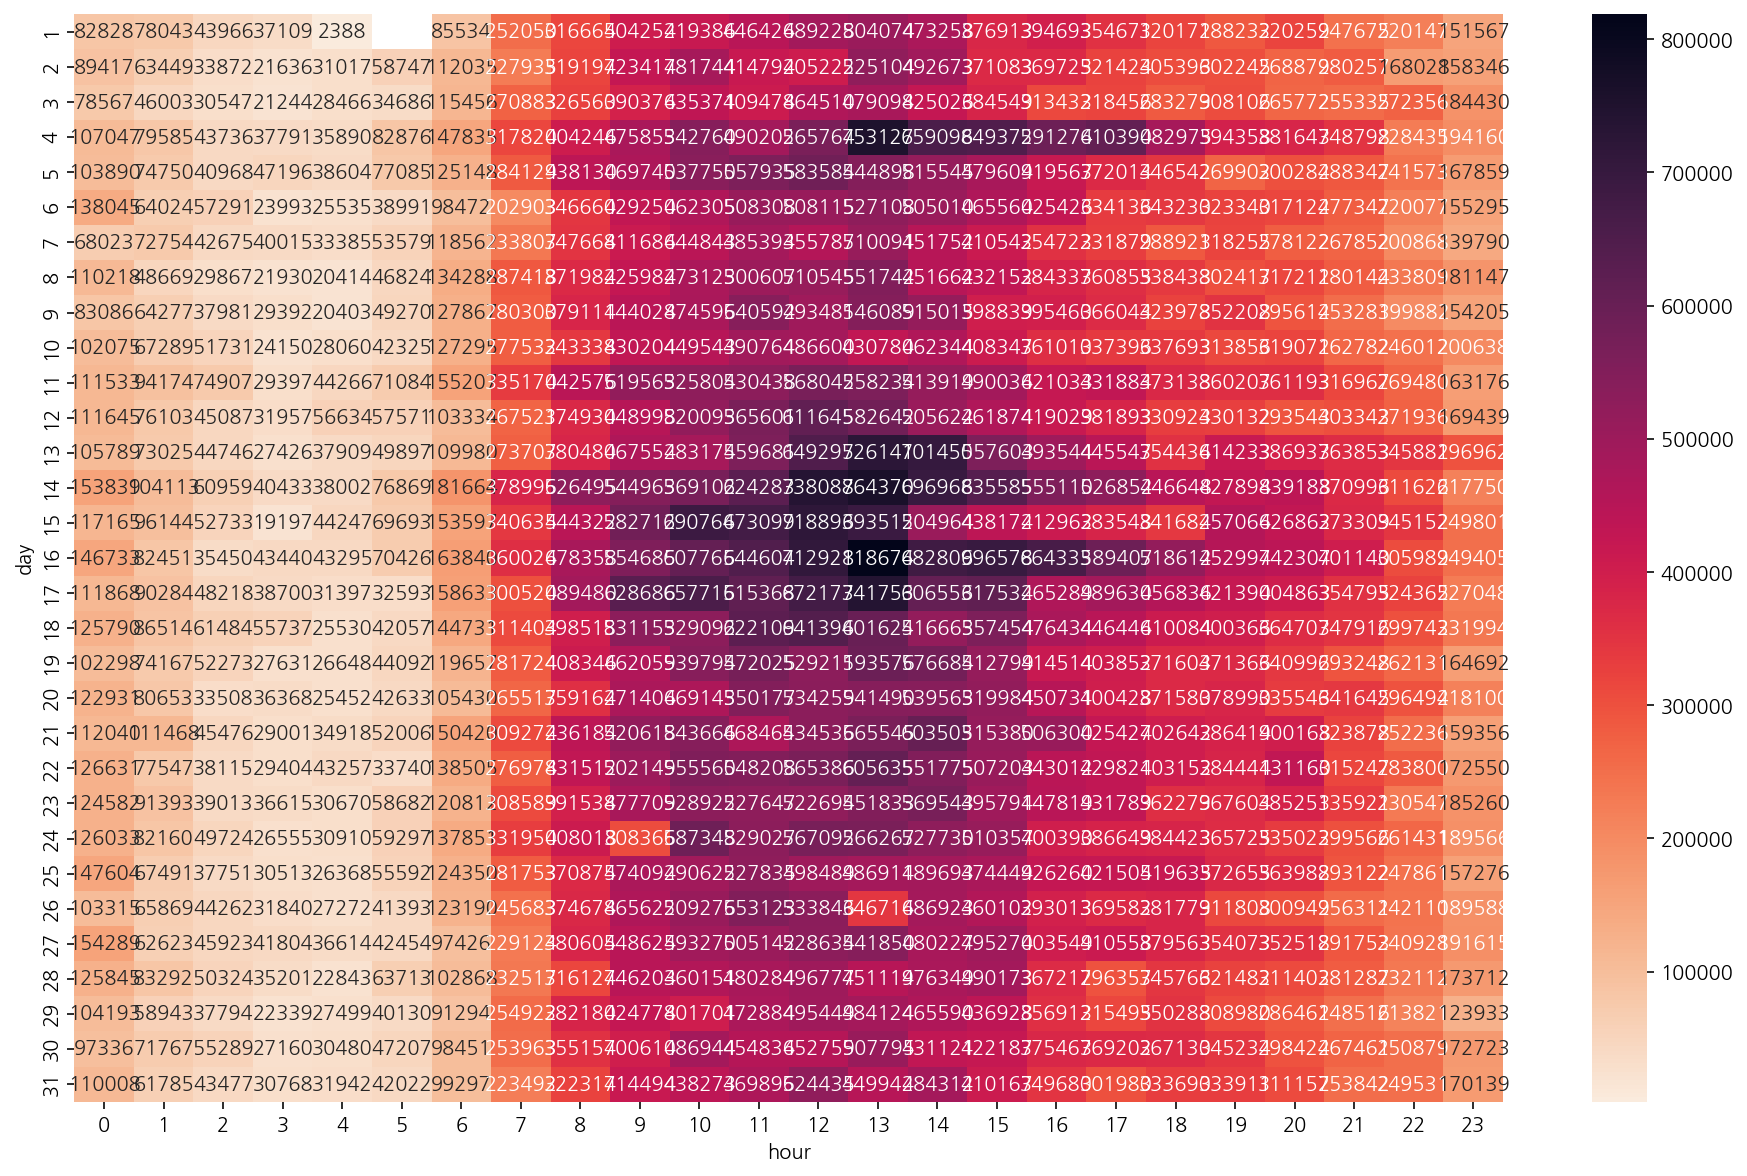

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pur_pivot,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

### 요일,시간별 히트맵

In [26]:
df_pur_week = df.loc[df['event_type']=='purchase']

df_pur_week['event_time'] = df_pur_week['event_time'].dt.to_period('H')
df_pur_week = df_pur_week.groupby('event_time').sum().reset_index()
df_pur_week['day'] = df_pur_week['event_time'].dt.weekday
df_pur_week['hour'] = df_pur_week['event_time'].dt.hour
df_pur_week = df_pur_week[['event_time','day','hour','price']].reset_index(drop=True)

df_pur_week

event_time  day  hour      price
0    2019-10-01 04:00    1     4    2387.84
1    2019-10-01 06:00    1     6   85533.96
2    2019-10-01 07:00    1     7  252050.18
3    2019-10-01 08:00    1     8  316664.79
4    2019-10-01 09:00    1     9  404252.06
..                ...  ...   ...        ...
738  2019-10-31 23:00    3    23  170138.77
739  2019-11-01 00:00    4     0   82827.54
740  2019-11-01 01:00    4     1   78043.44
741  2019-11-01 02:00    4     2   43966.35
742  2019-11-01 03:00    4     3   37108.56

[743 rows x 4 columns]

In [27]:
df_pivot_week = df_pur_week.pivot_table(values='price', index='day', columns='hour')
df_pivot_week = df_pivot_week.round(0)

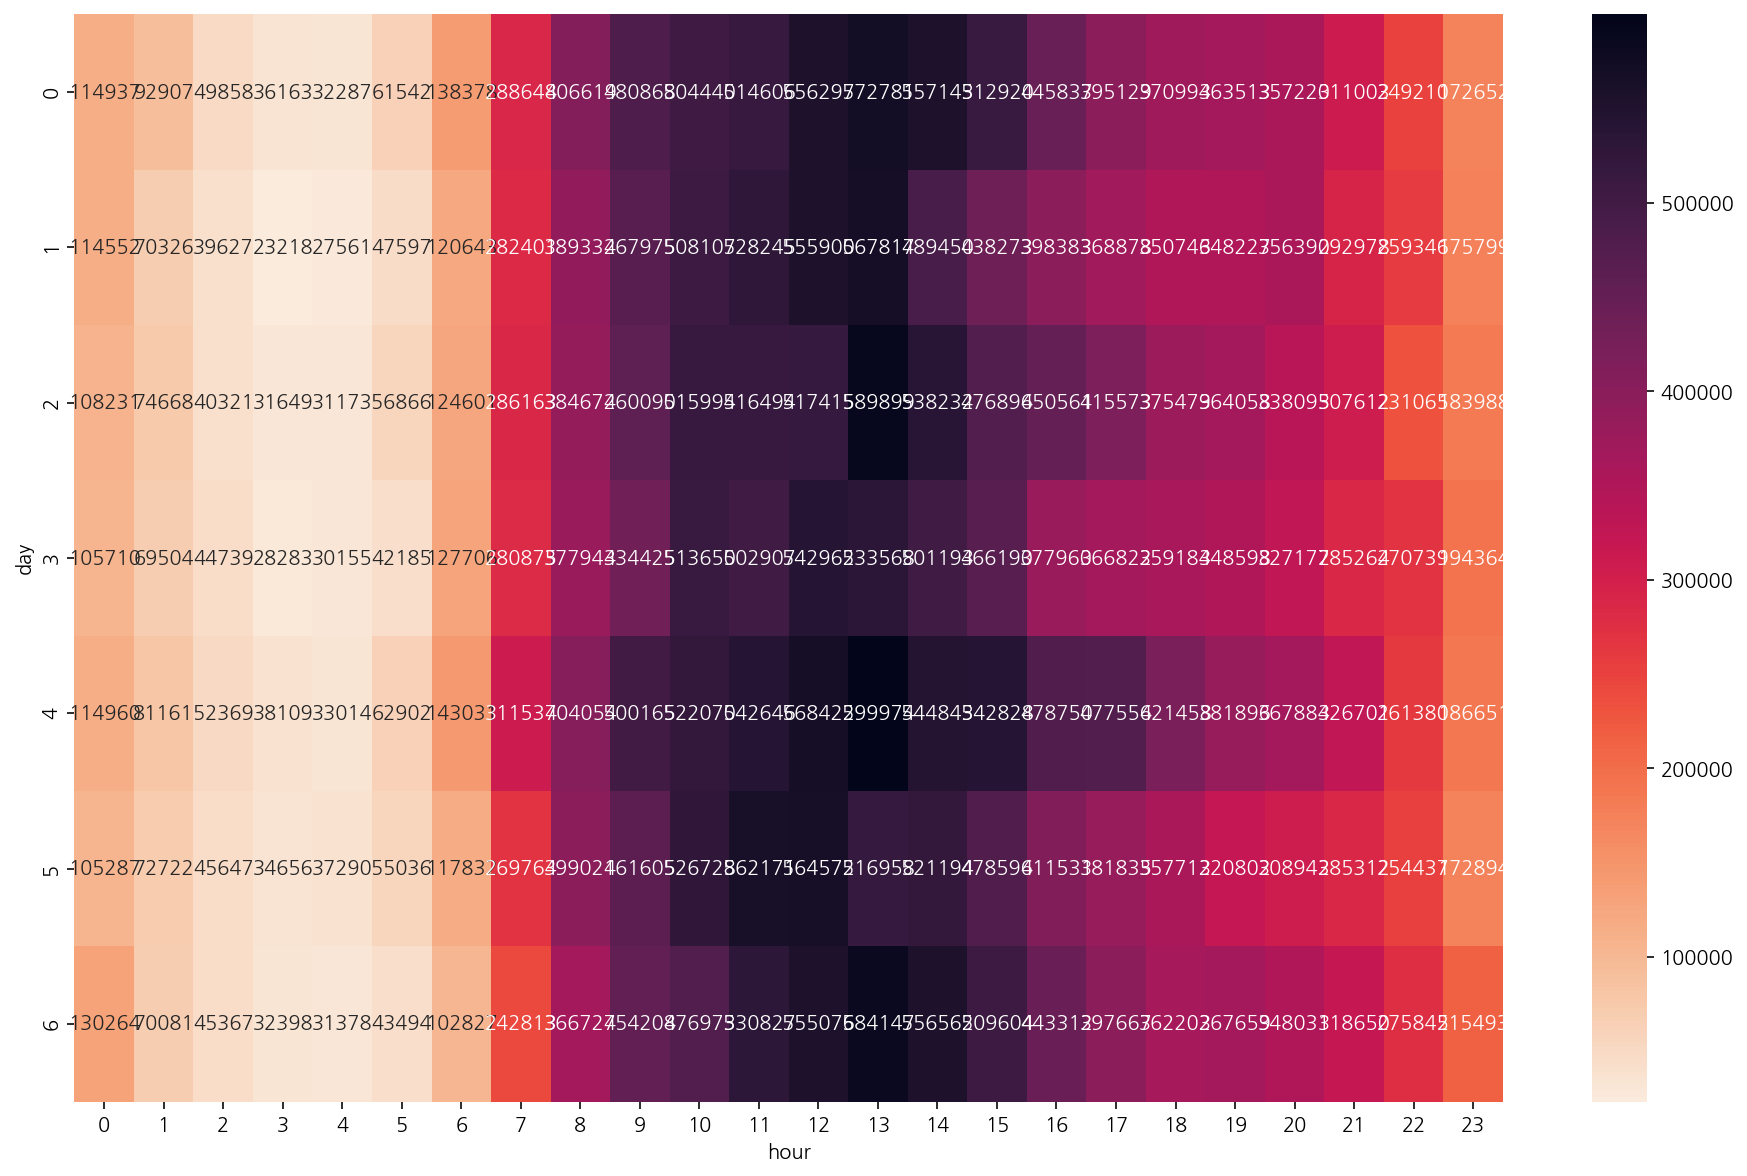

In [28]:
# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot_week,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

### category_code 기준 히트맵 제작

smartphone, video, kitchen 주간 히트맵

In [29]:
df_middle = df.copy()
df_middle['category_code'] = df_middle["category_code"].str.split(".").str[1]

In [30]:
def week(df,category,type):
    df_1 = df.loc[df['category_code']==category]
    df_1 = df_1.loc[df_1['event_type']==type]
    
    df_1['event_time'] = df_1['event_time'].dt.to_period('H')
    df_1 = df_1.groupby('event_time').count().reset_index()
    df_1['day'] = df_1['event_time'].dt.weekday
    df_1['hour'] = df_1['event_time'].dt.hour
    df_1 = df_1[['event_time','day','hour','price']].reset_index(drop=True)
    df_1 = df_1.pivot_table(values='price', index='day', columns='hour')
    df_1 = df_1.round(0)
    # 그래프 크기 설정
    plt.figure(figsize=(16,10))

    # 히트맵 그래프 그리기
    sns.heatmap(df_1, annot = True, fmt='.0f',cmap='rocket_r')

    # 그래프 표현
    plt.show()


smartphone 기준

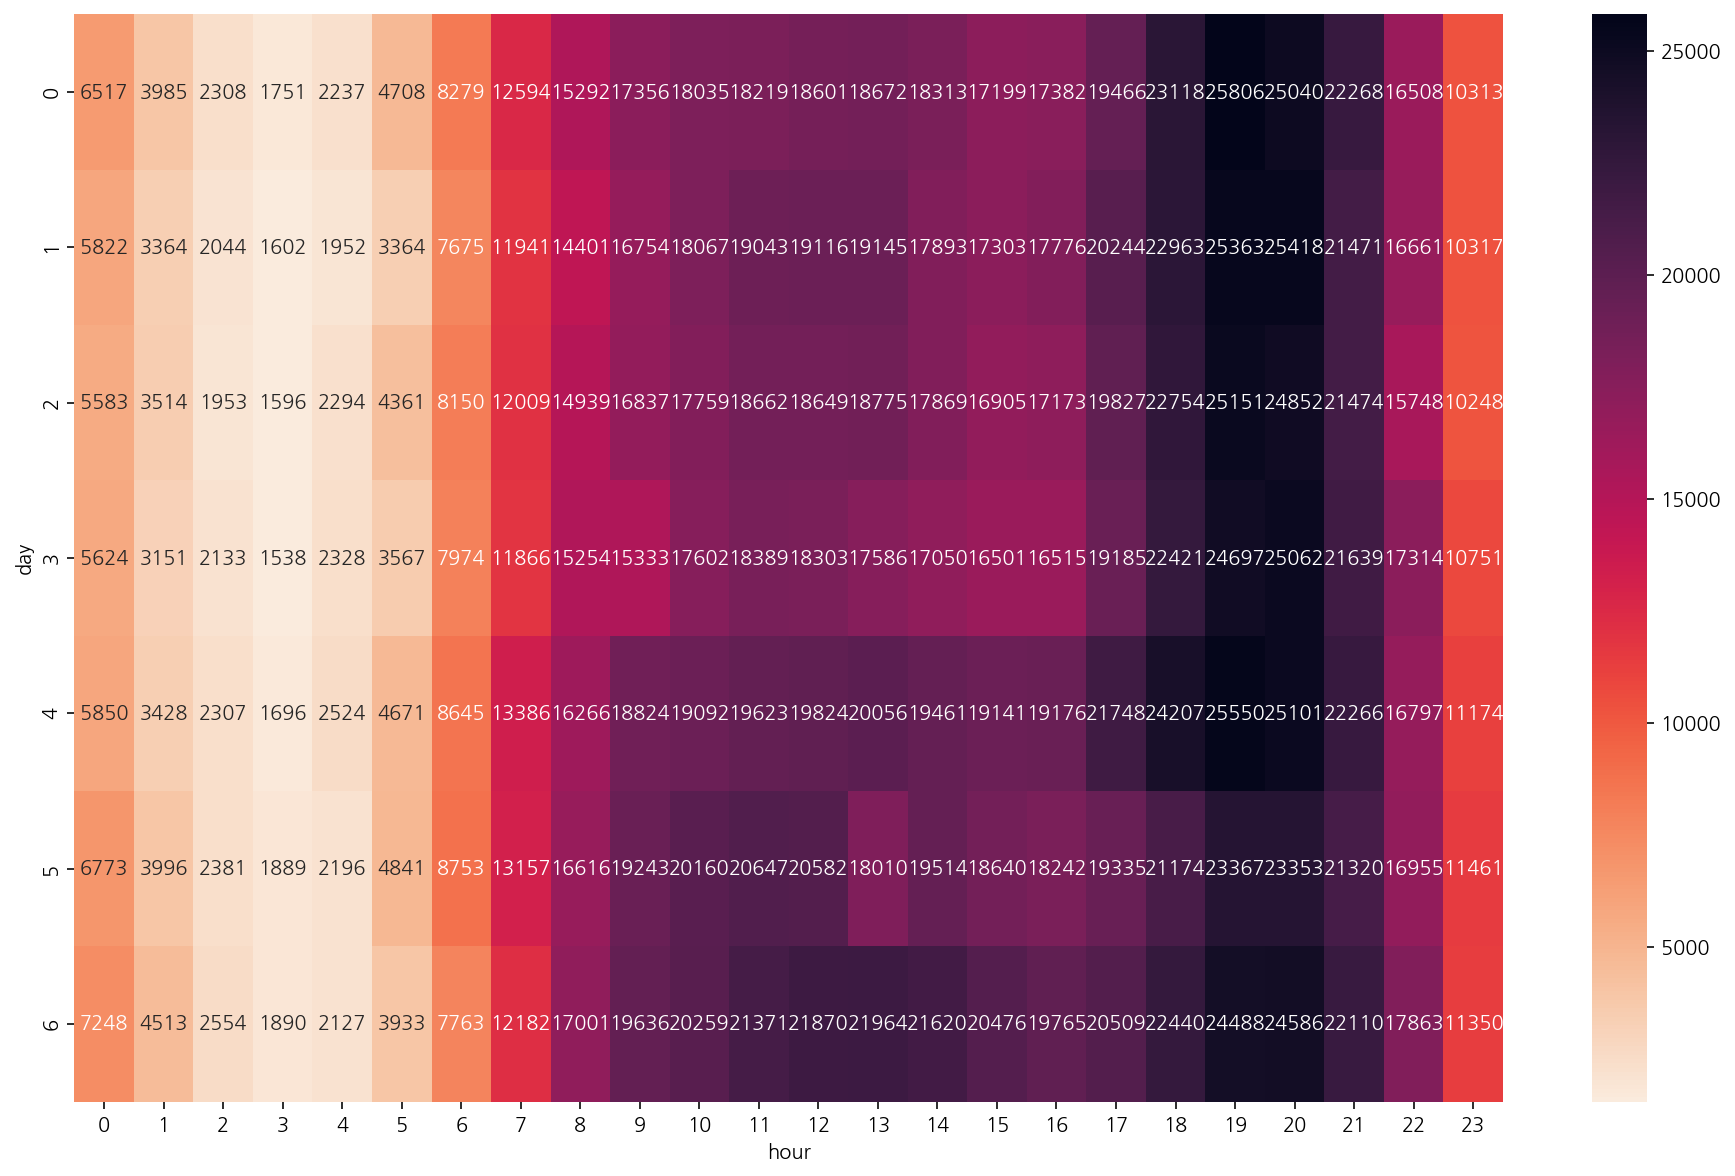

In [31]:
# smartphone

week(df_middle,'smartphone','view')

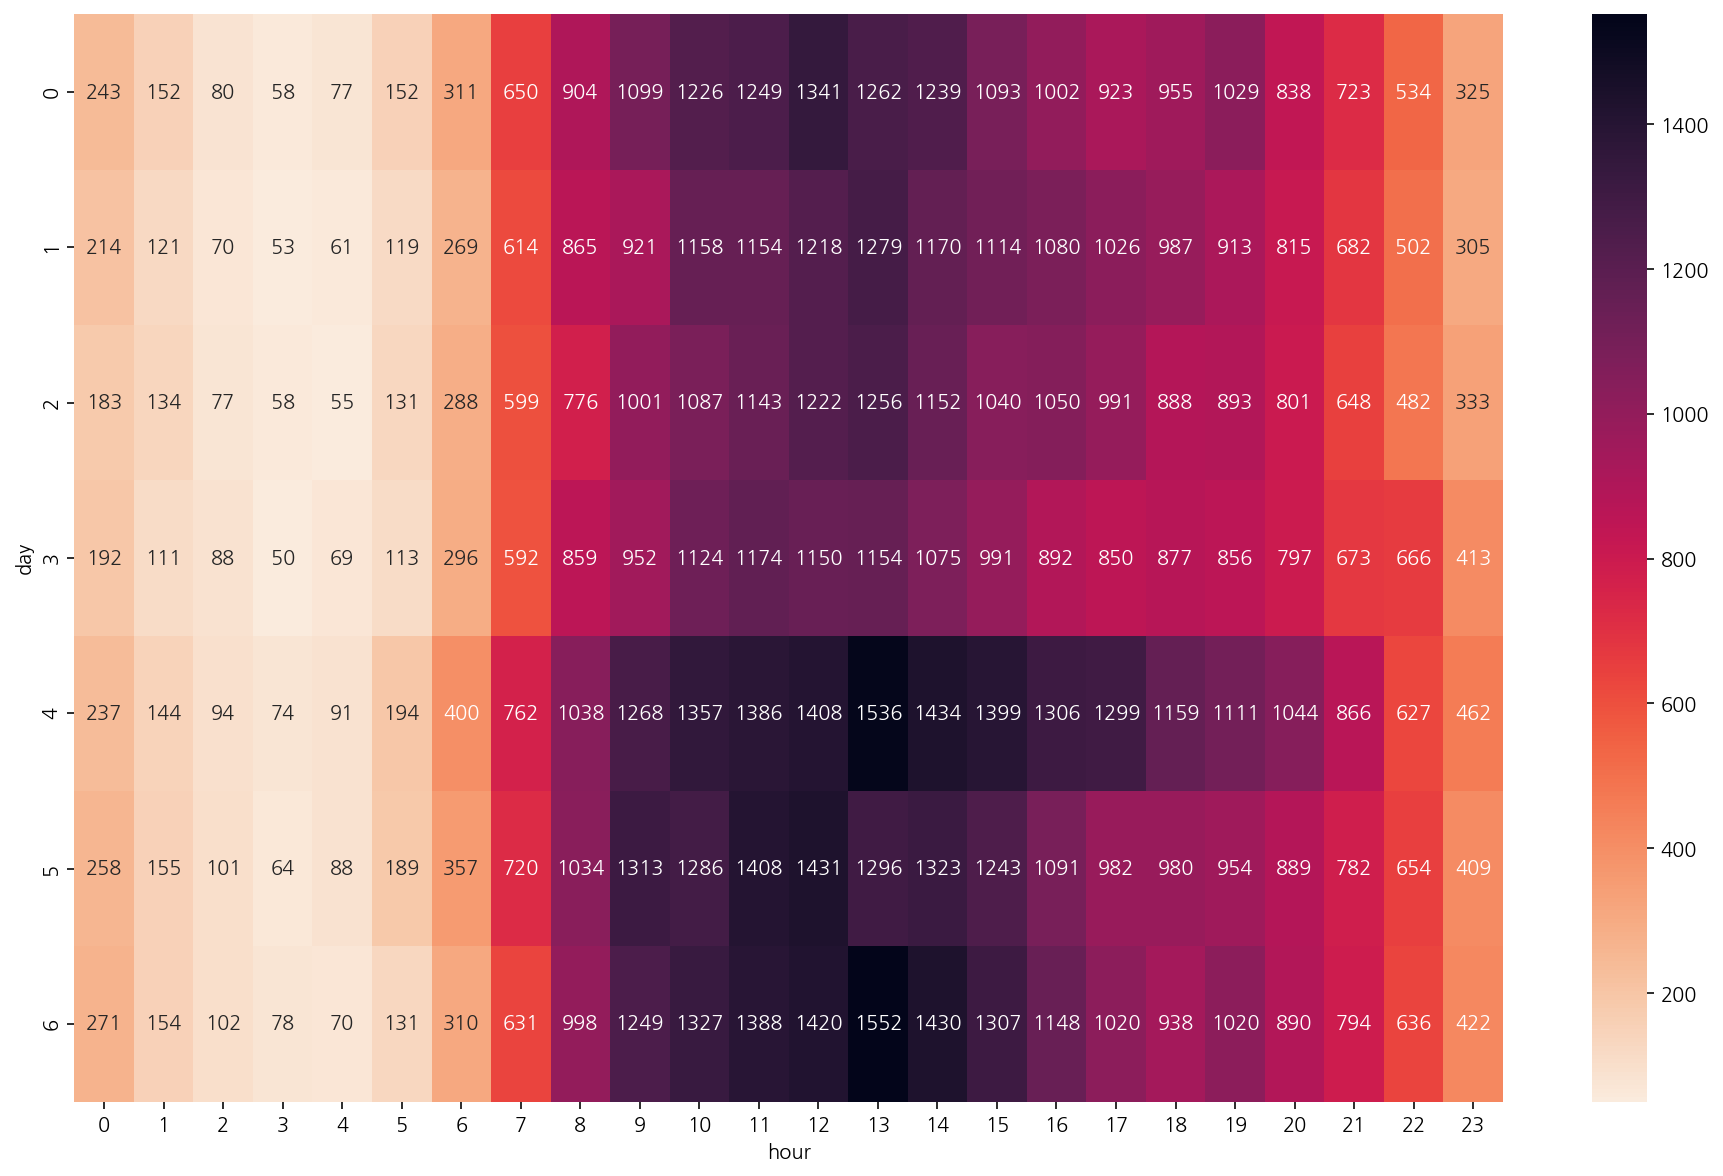

In [32]:
week(df_middle,'smartphone','cart')

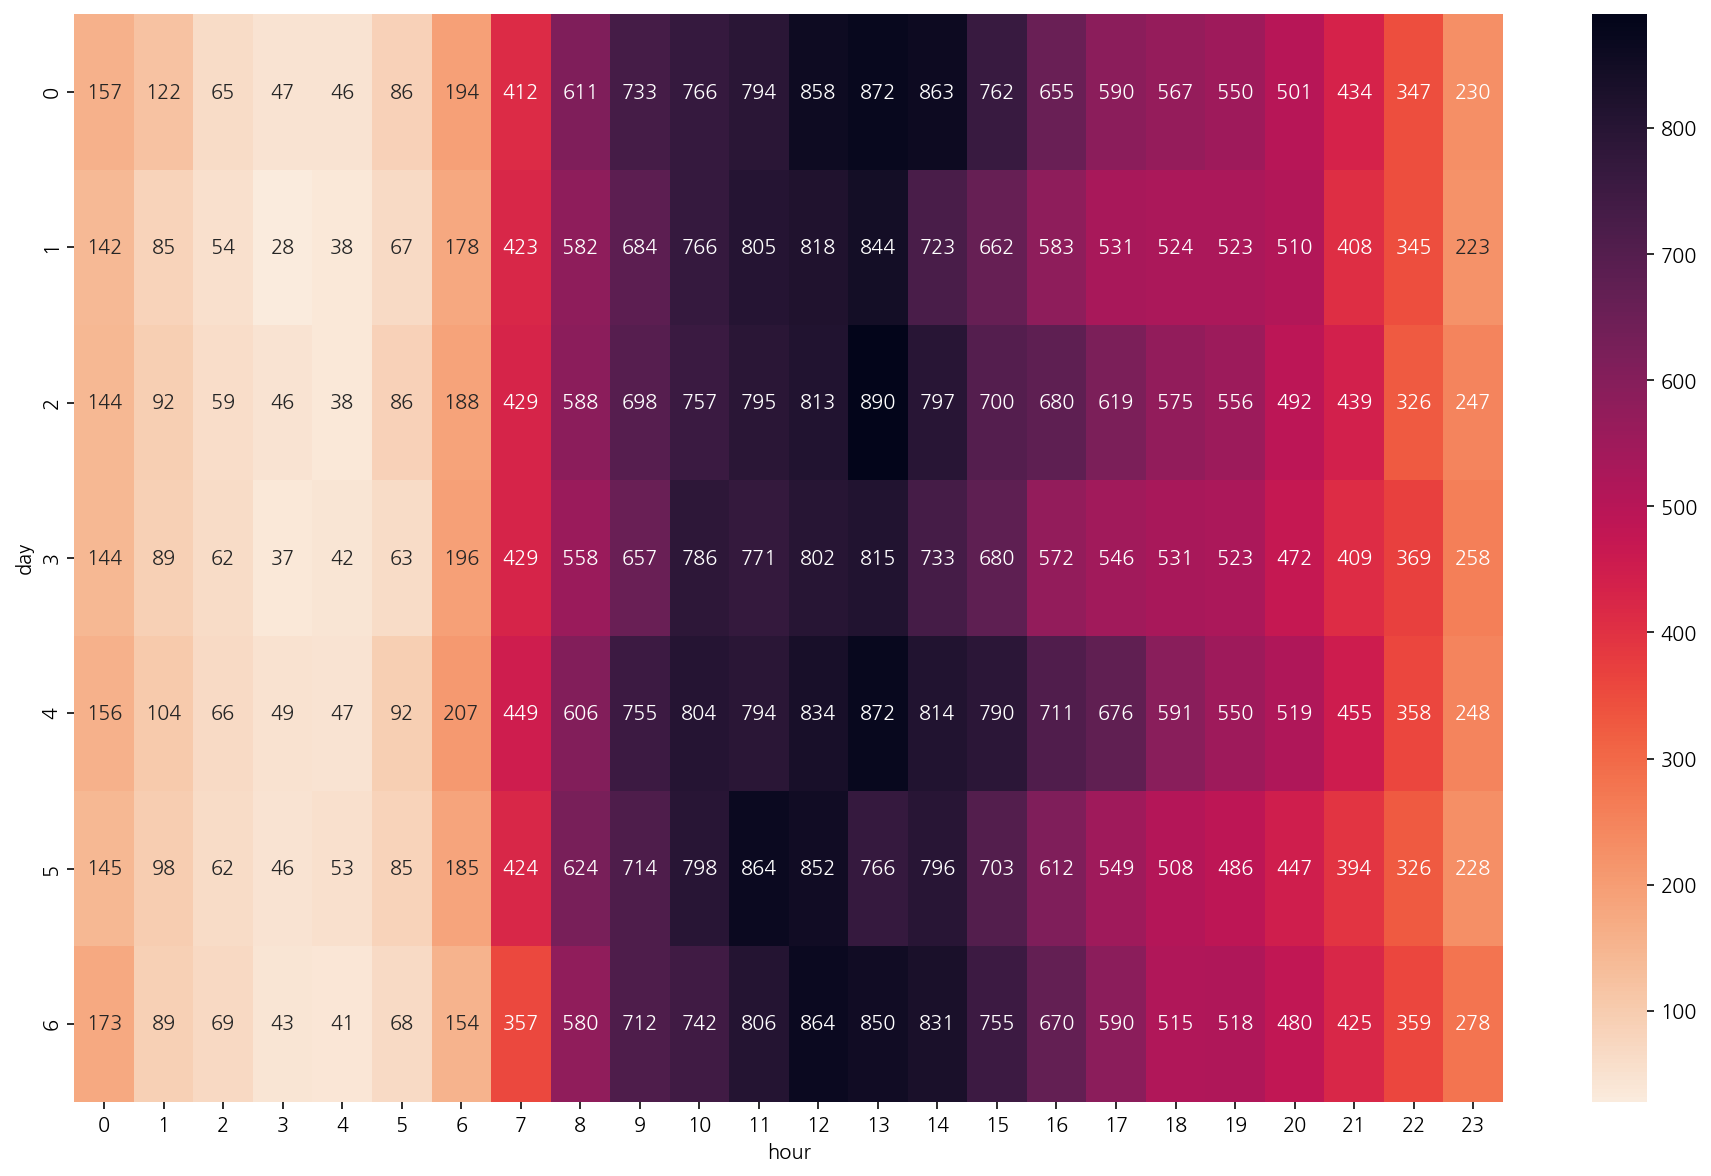

In [33]:
week(df_middle,'smartphone','purchase')

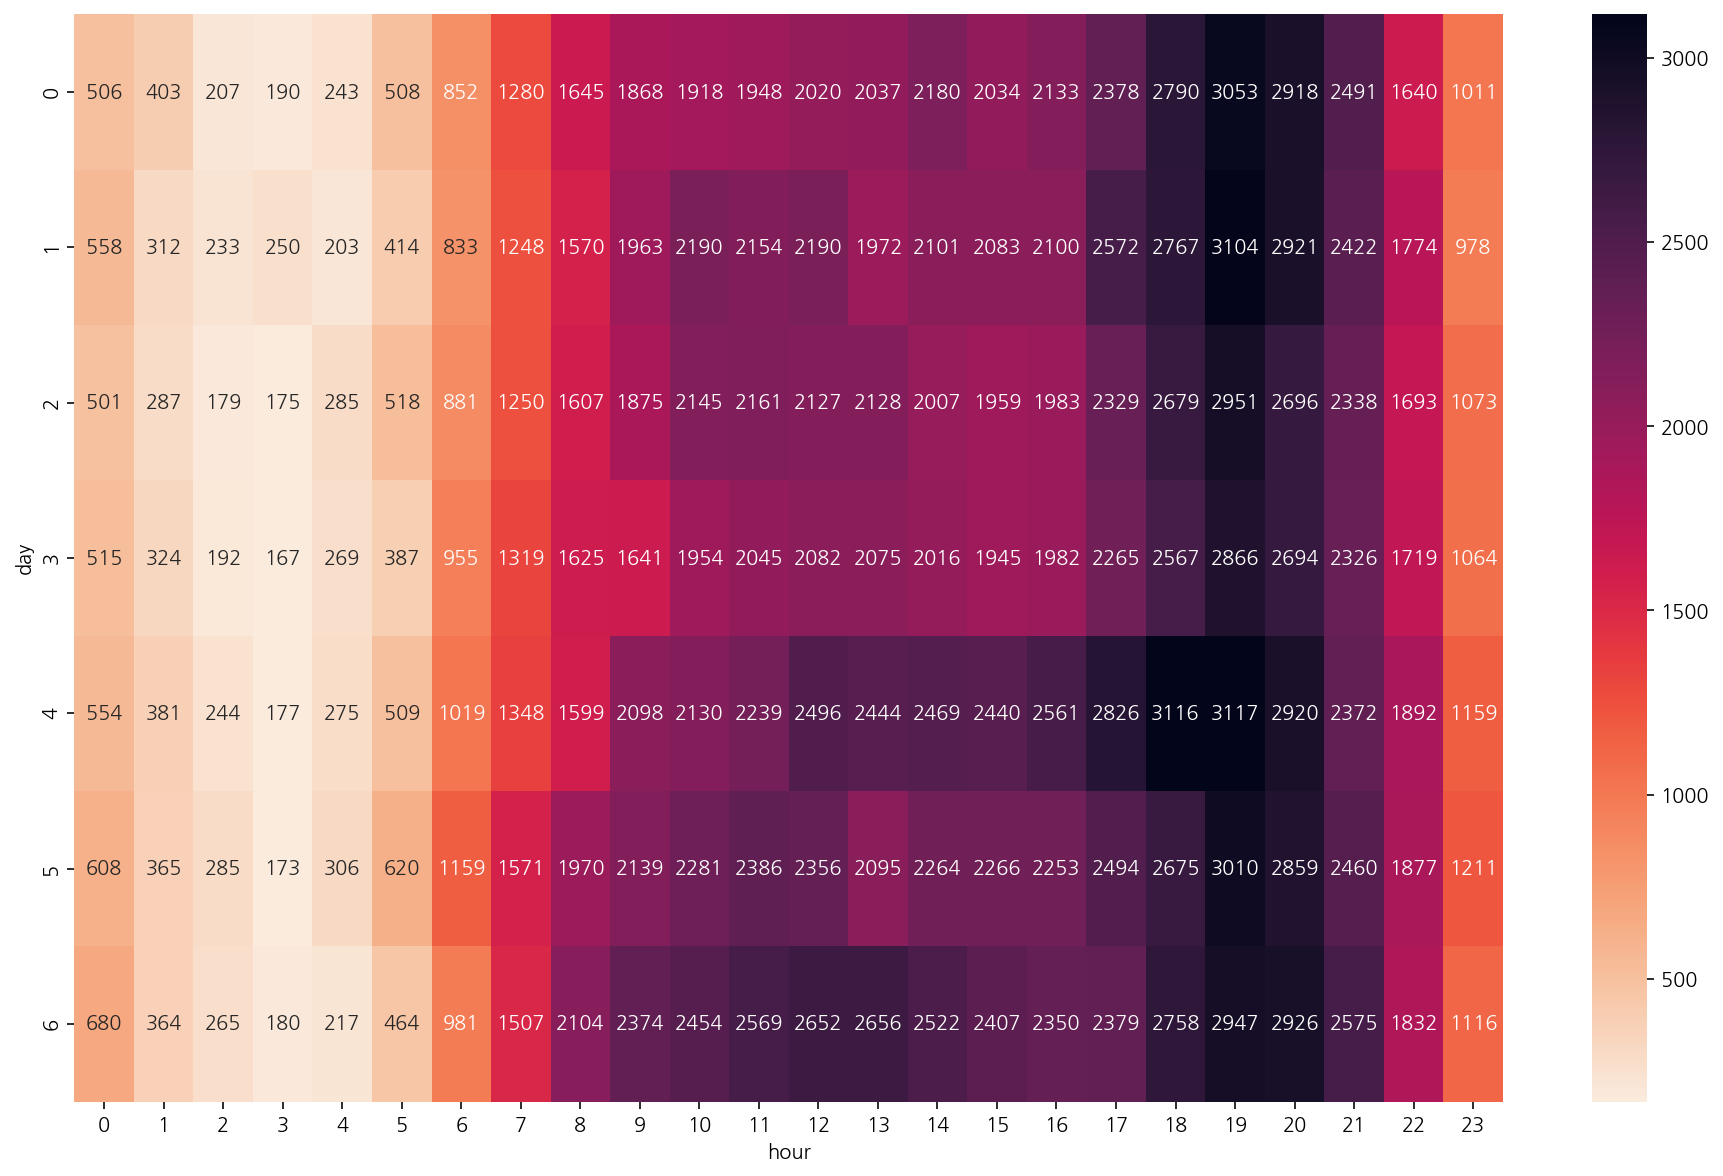

In [34]:
# video

week(df_middle,'video','view')

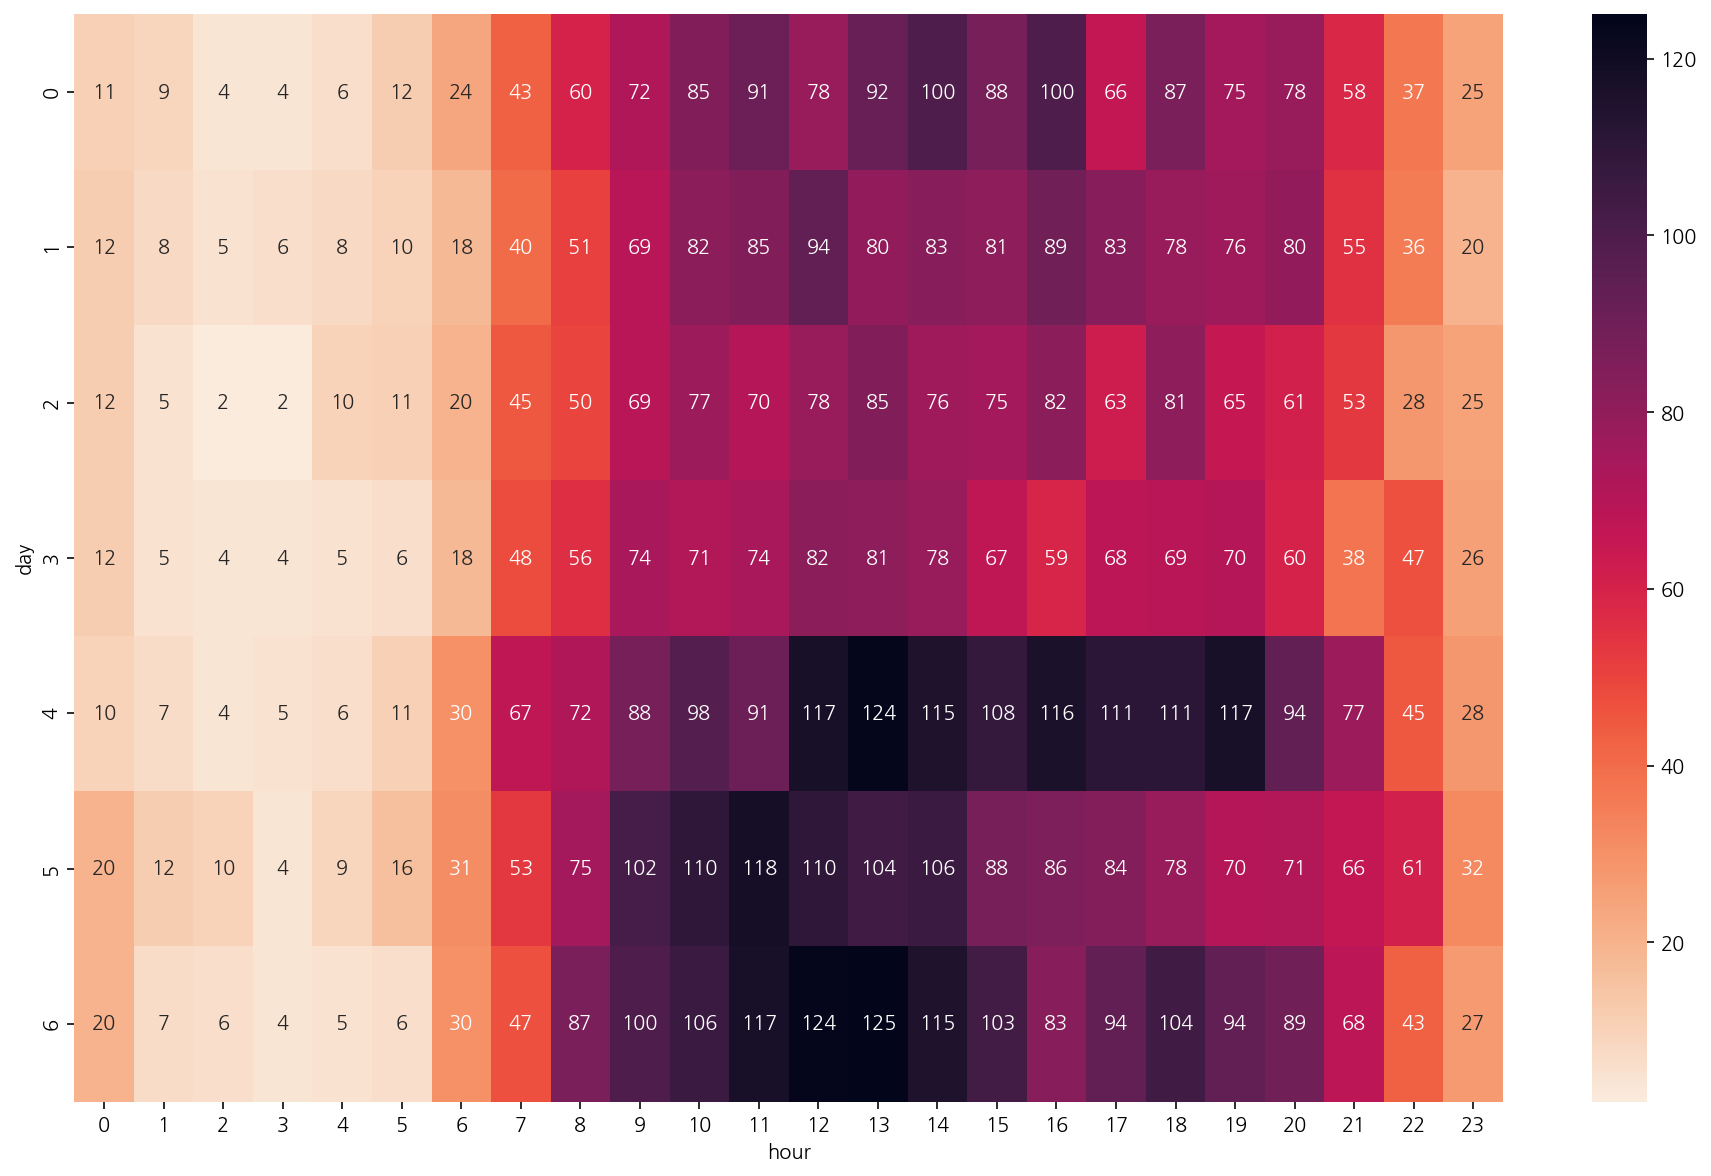

In [35]:
week(df_middle,'video','cart')

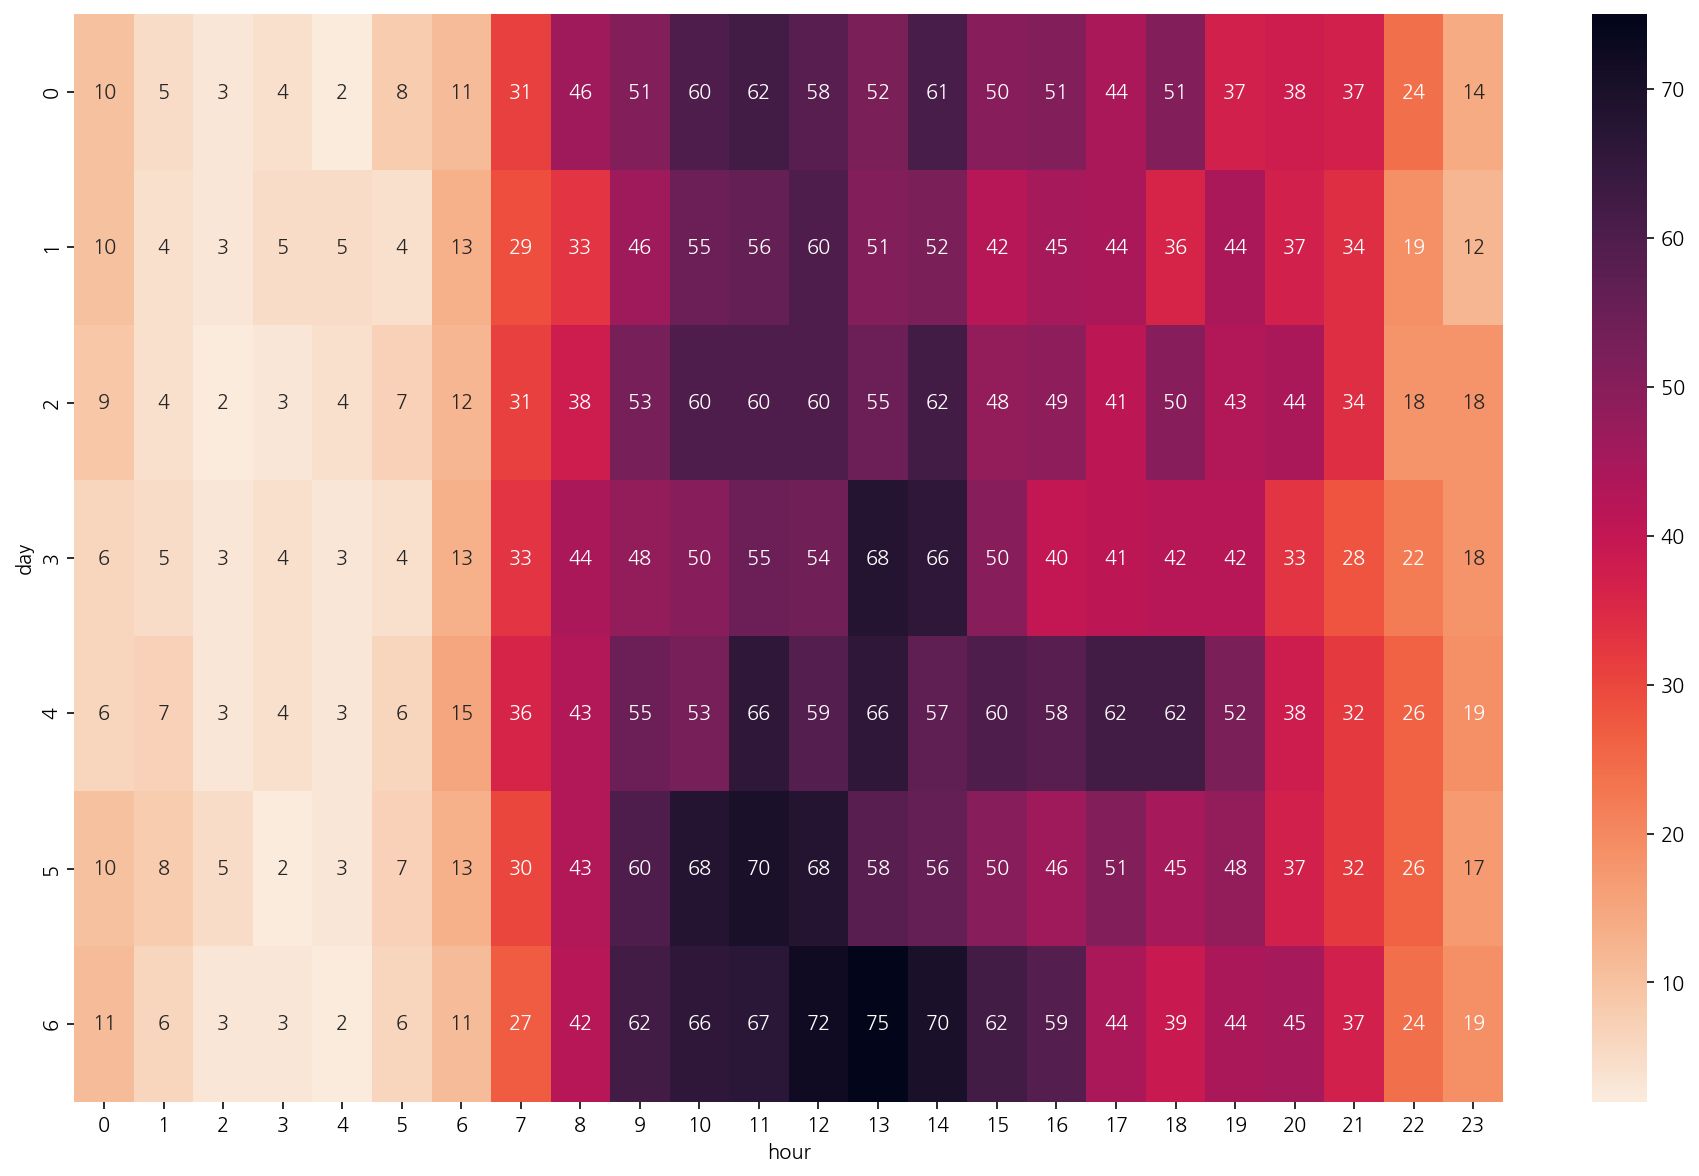

In [36]:
week(df_middle,'video','purchase')

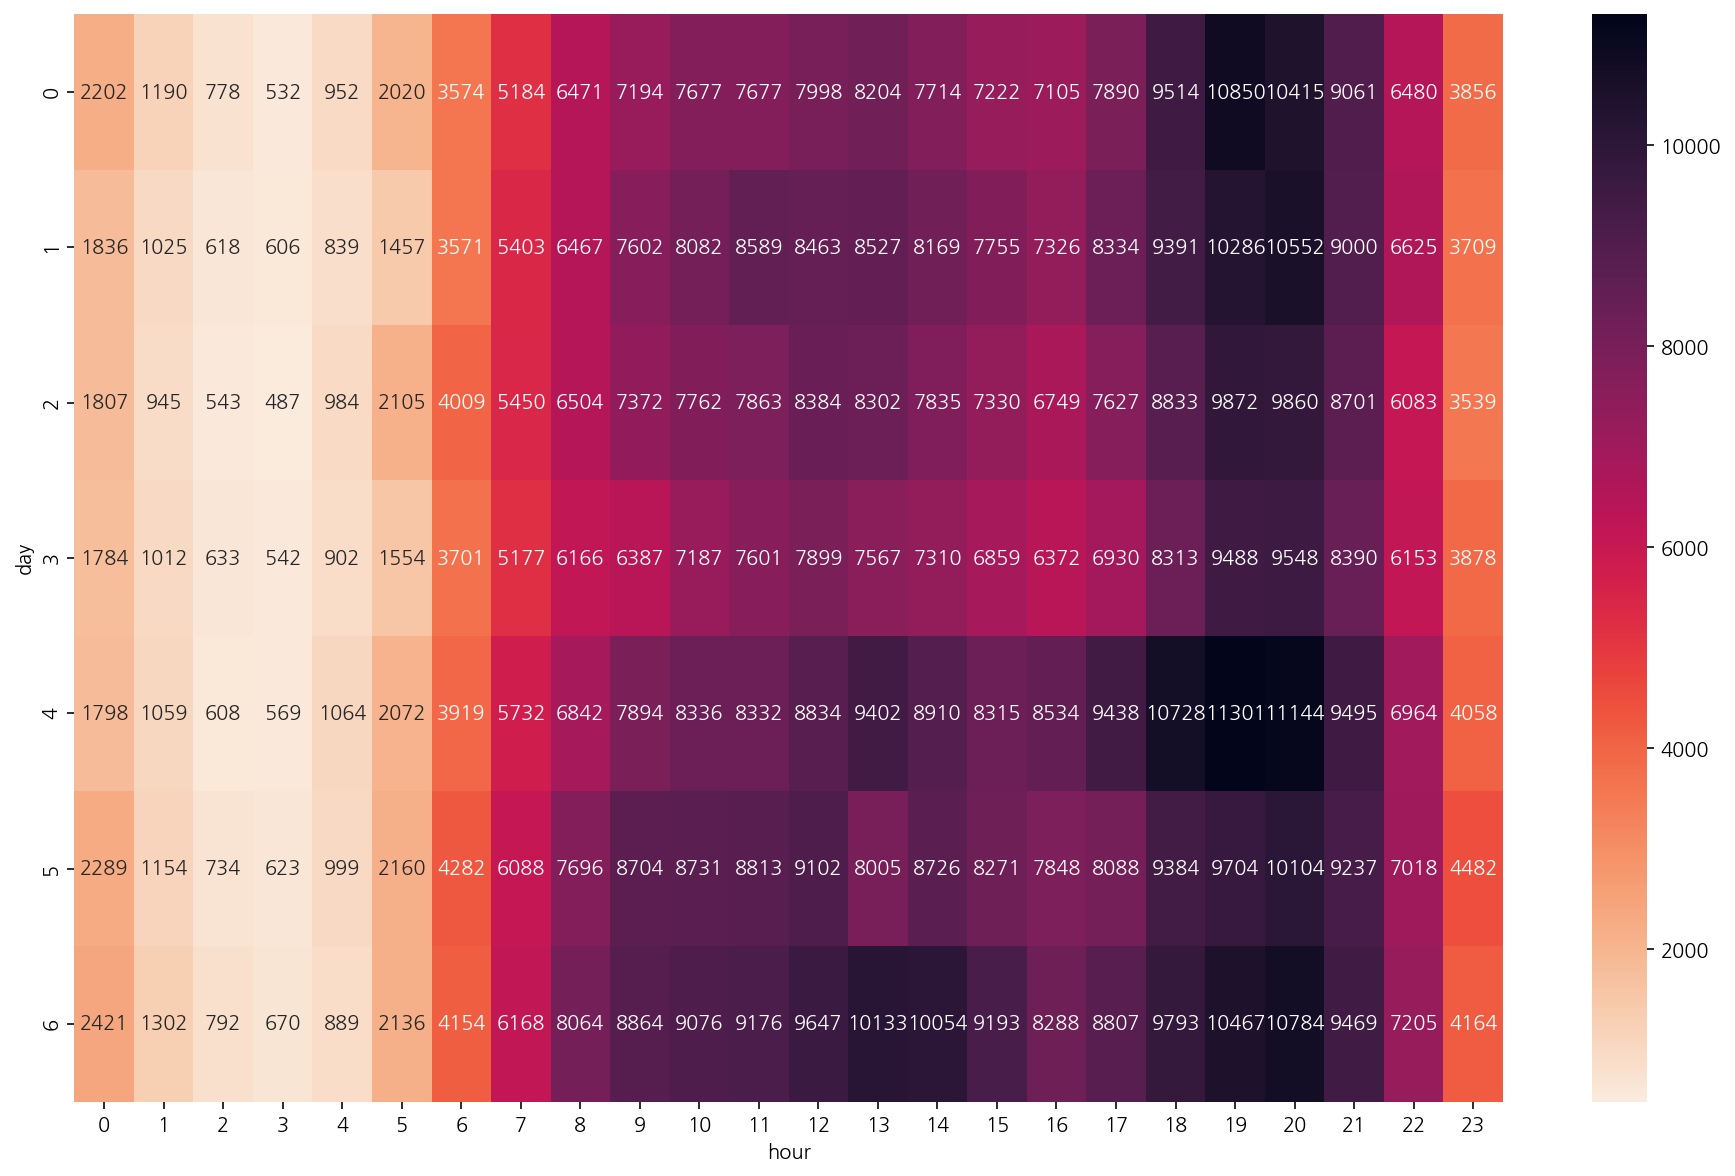

In [37]:
# kitchen

week(df_middle,'kitchen','view')

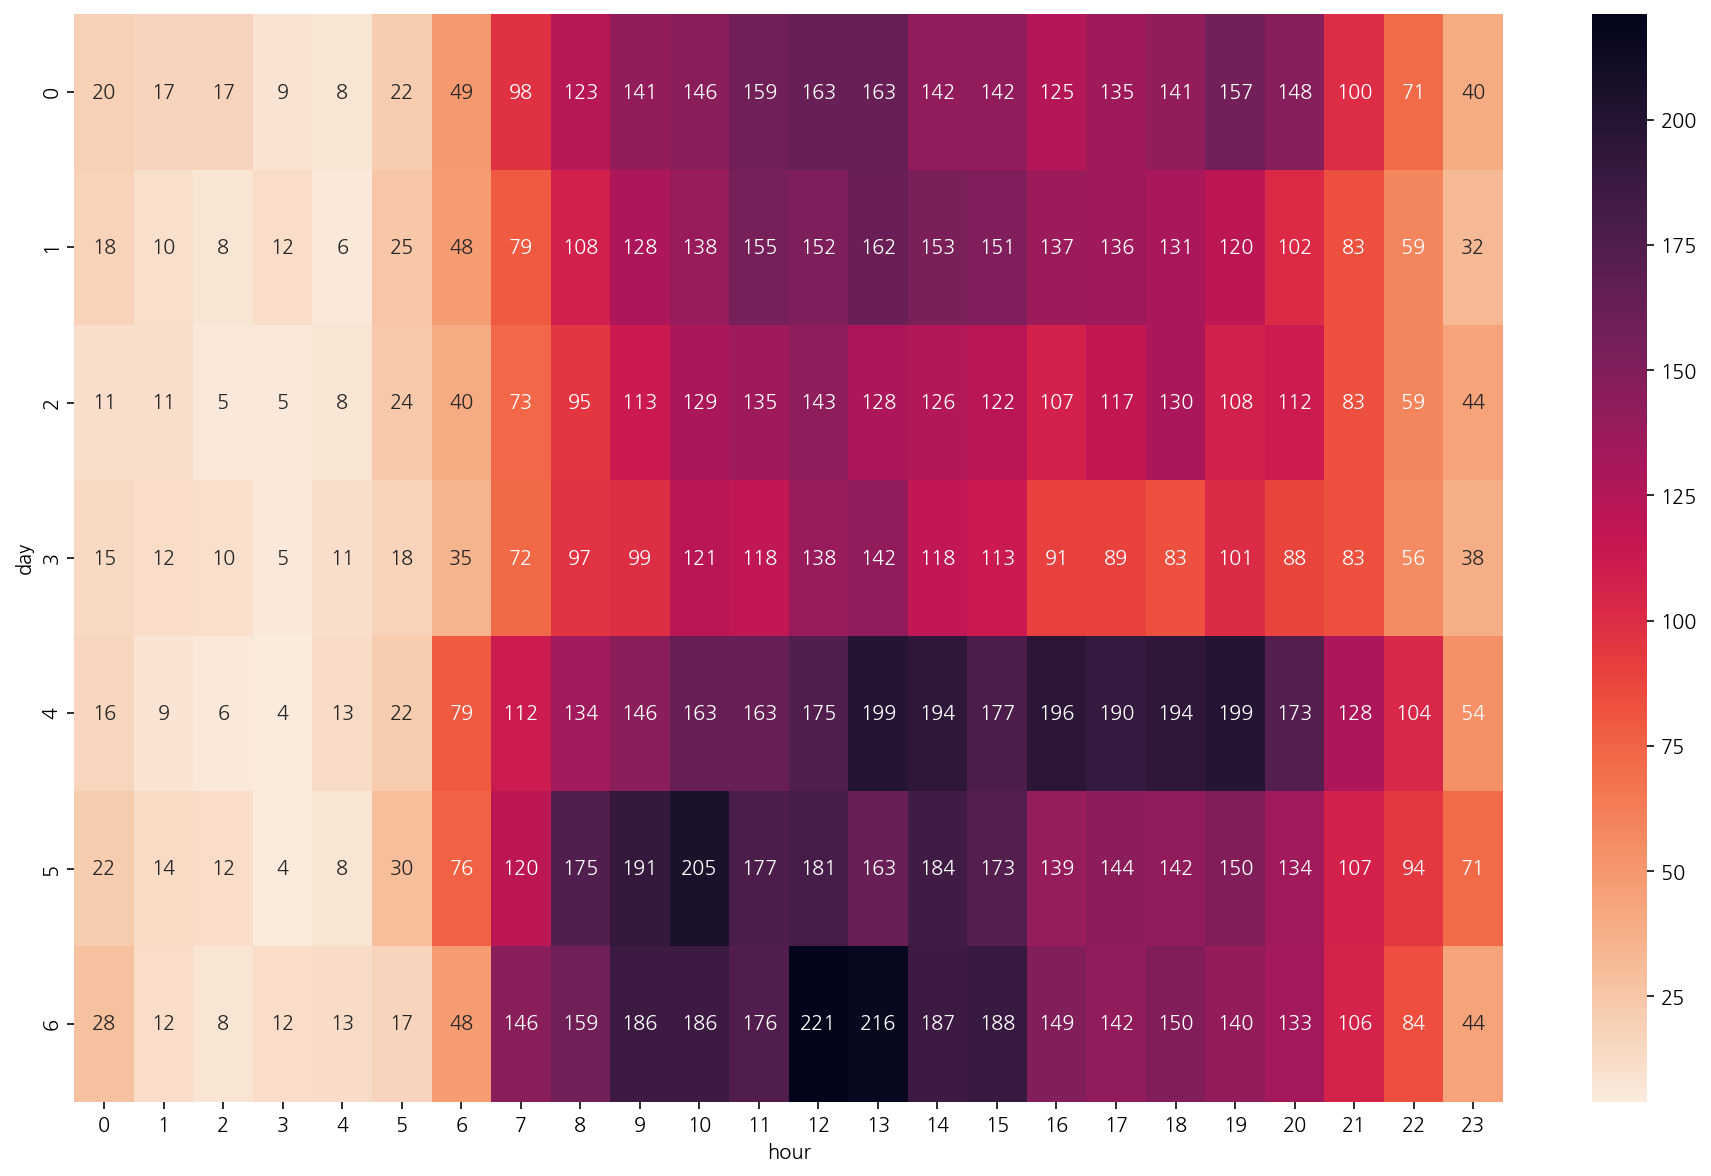

In [38]:
week(df_middle,'kitchen','cart')

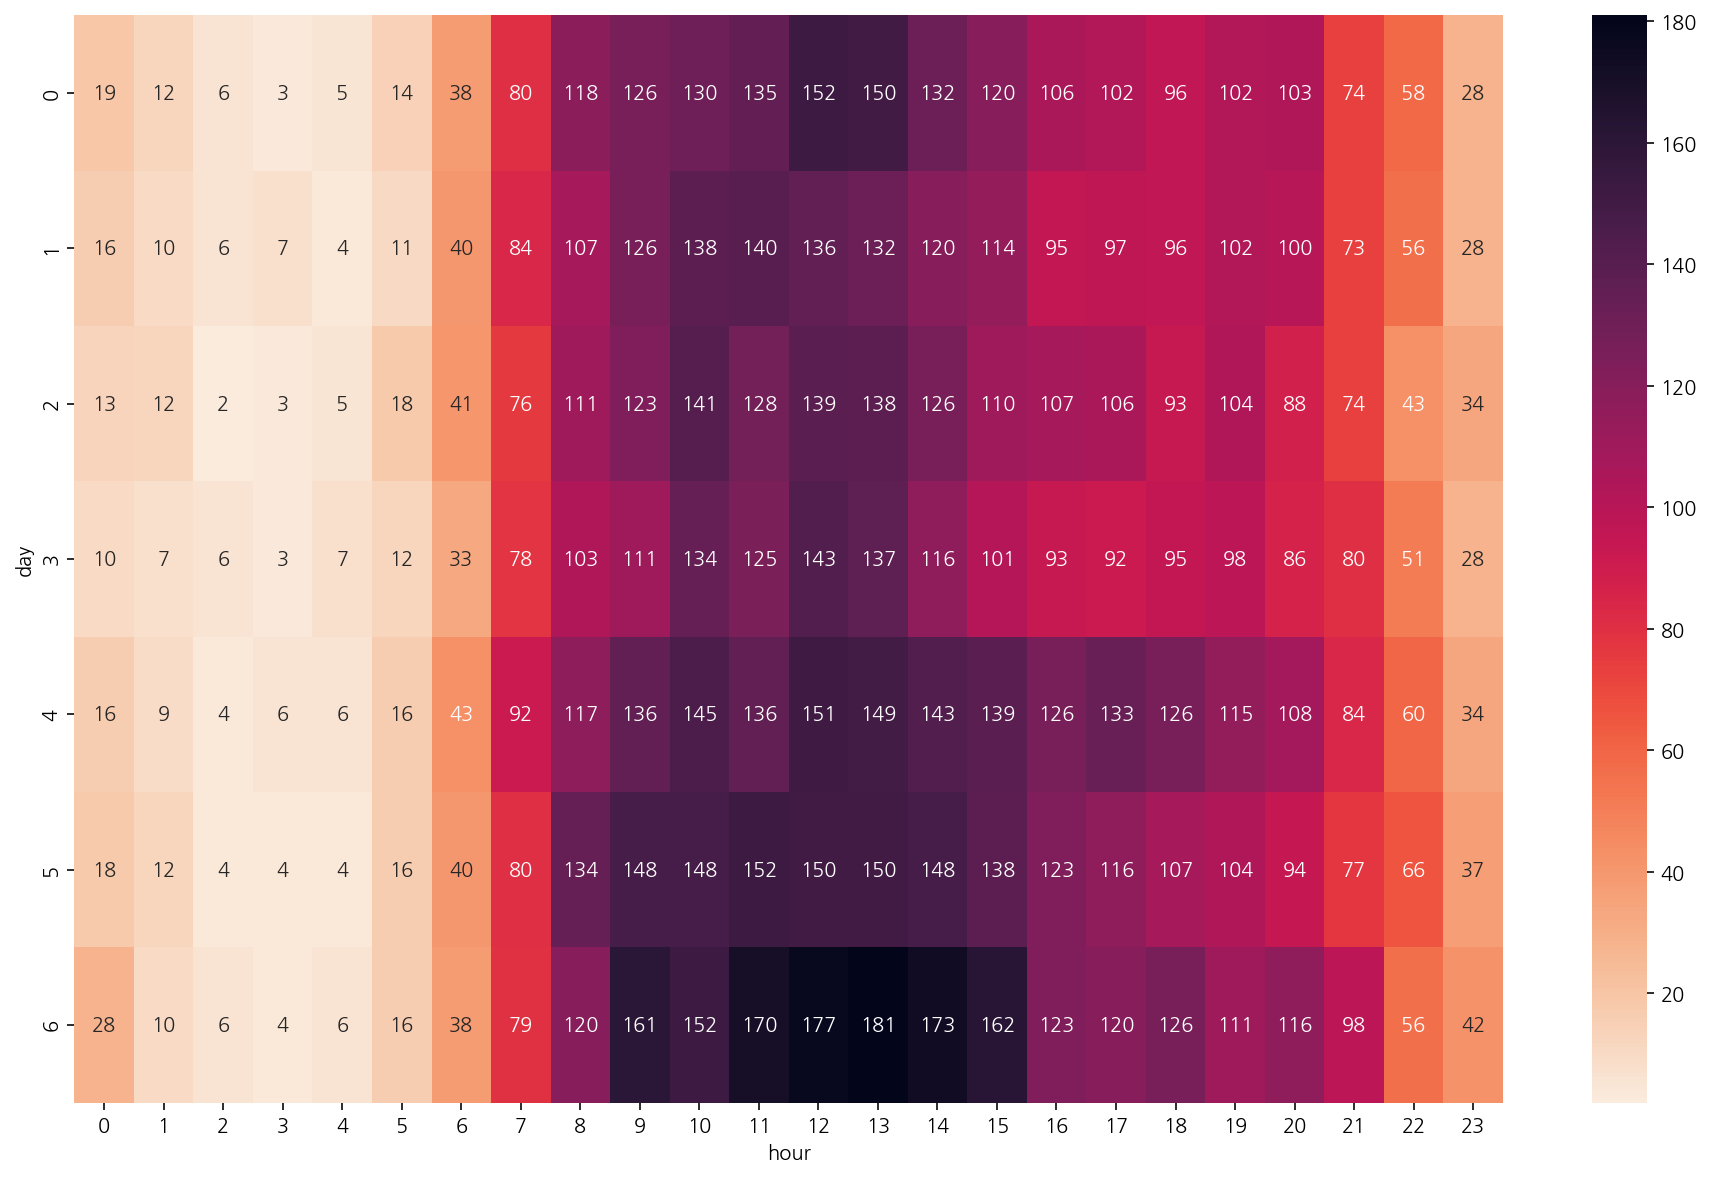

In [39]:
week(df_middle,'kitchen','purchase')

# user_id기준 user_session이 변하는 시간 체크

In [40]:
from datetime import timedelta

def sess_diff(df, user_id):
    user_cond = (df["user_id"] == user_id)
    user_sess = df[user_cond]["user_session"]
    user_time = df[user_cond]["event_time"]
    user_event = df[user_cond]["event_type"]
    length = len(user_sess)

    diff_sess = {}
    date_time = []
    time_diff = []
    sess_idx = []
    sess_data = []
    event_data = []

    date_time.append(user_time.iloc[0])
    time_diff.append(timedelta(seconds=0))
    sess_idx.append(0)
    sess_data.append(user_sess.iloc[0])
    event_data.append(user_event.iloc[0])

    i = 1
    while i < length-1:

        if user_sess.iloc[i] != user_sess.iloc[i+1]:
            date_time.append(user_time.iloc[i+1])
            time_diff.append(user_time.iloc[i+1] - user_time.iloc[i])
            sess_idx.append(i+1)
            sess_data.append(user_sess.iloc[i+1])
            event_data.append(user_event.iloc[i+1])

        i+=1

    diff_sess["event_time"] = date_time
    diff_sess["event_type"] = event_data
    diff_sess["time_diff"] = time_diff
    diff_sess["sess_idx"] = sess_idx
    diff_sess["sess_data"] = sess_data
    
    sess_diff_df = pd.DataFrame(diff_sess)
    
    return sess_diff_df

In [41]:
sess_diff(df, 513605798)

event_time event_type       time_diff  sess_idx  \
0 2019-10-01 07:23:28+04:00       view 0 days 00:00:00         0   
1 2019-10-07 17:24:58+04:00       view 0 days 00:36:54      1159   

                              sess_data  
0  fb075266-182d-4c11-b5f7-4e4dcdabd4a7  
1  d899b518-ff25-4920-a06d-c9032e2bb7ca

In [42]:
sess_diff(df, 542048657)

event_time event_type       time_diff  sess_idx  \
0  2019-10-22 07:06:12+04:00       view 0 days 00:00:00         0   
1  2019-10-22 07:13:02+04:00       view 0 days 00:02:05         4   
2  2019-10-22 07:27:40+04:00       view 0 days 00:08:20        14   
3  2019-10-22 08:36:22+04:00       view 0 days 00:35:41        43   
4  2019-10-22 14:45:02+04:00       view 0 days 00:02:25      1180   
5  2019-10-29 15:11:54+04:00       view 6 days 23:07:50      1524   
6  2019-10-29 15:12:43+04:00       view 0 days 00:00:49      1525   
7  2019-10-29 15:17:01+04:00       view 0 days 00:01:11      1541   
8  2019-10-29 15:48:33+04:00       view 0 days 00:10:28      1619   
9  2019-10-29 15:55:10+04:00       view 0 days 00:00:48      1655   
10 2019-10-30 20:59:14+04:00       view 1 days 04:56:39      1700   

                               sess_data  
0   0e5e2c6a-1349-41a0-ada3-b763523a50ab  
1   b766ffa1-a88e-4574-a4cb-bec08bd68414  
2   fe24d407-2b96-4d8f-b4ef-10e4567c8961  
3   cfb90a35-9575-495c-b6aa-48ddca2a7a9c  
4   f3fde14e-c022-446a-9629-1a85f3102a8e  
5   ccb2c18e-da99-4520-9dbe-5ad76ede3eb2  
6   6fca5b5f-be98-4d3f-9e83-101251d23e67  
7   09dc9390-ddbf-4b66-a417-32ea55c13642  
8   218dd8bb-ccf1-4d51-bd57-4f8b782c8d70  
9   43badaee-56d6-4018-9d4d-b20f57bfc0e4  
10  2170cbfe-977d-4ed5-a0bc-8c12165082e5

In [43]:
sess_diff(df, 513851612)

event_time event_type        time_diff  sess_idx  \
0  2019-10-02 12:48:45+04:00       view  0 days 00:00:00         0   
1  2019-10-12 21:41:06+04:00       view 10 days 08:51:43         2   
2  2019-10-24 11:32:21+04:00       view 11 days 13:47:13        10   
3  2019-10-24 12:11:44+04:00       view  0 days 00:31:15        15   
4  2019-10-24 12:27:05+04:00       view  0 days 00:03:47        29   
5  2019-10-24 23:11:52+04:00       view  0 days 01:30:41       613   
6  2019-10-24 23:19:03+04:00       view  0 days 00:01:56       621   
7  2019-10-25 00:13:36+04:00       view  0 days 00:30:18       694   
8  2019-10-25 11:00:31+04:00       view  0 days 10:29:38       704   
9  2019-10-25 12:15:38+04:00       view  0 days 01:10:43       711   
10 2019-10-25 12:37:21+04:00       view  0 days 00:06:16       723   
11 2019-10-25 12:56:14+04:00       view  0 days 00:01:38       741   
12 2019-10-25 18:12:40+04:00       view  0 days 05:05:07       771   
13 2019-10-26 07:48:27+04:00       view  0 days 11:57:00       860   
14 2019-10-26 18:18:19+04:00       view  0 days 10:21:43       875   
15 2019-10-27 08:43:12+04:00       view  0 days 14:23:16       881   
16 2019-10-28 16:45:23+04:00       view  1 days 07:47:04       905   

                               sess_data  
0   93e8f122-ace0-4bc1-991b-bb8734d3ca0f  
1   edb4d48c-bfa8-4504-95f5-a69830171637  
2   89262cb0-471a-4374-b048-79ccdf958137  
3   09675282-69c7-4f8c-bda4-4053ab644b14  
4   2183f046-46f1-4ff6-96ef-f74986e7c8a1  
5   261f3793-c39d-4628-9e8f-3d532a2add27  
6   ccef2fc7-2fb4-41cf-9e01-74c42f4fdf83  
7   98742a85-b4a0-468a-9572-a8bd1ce7e453  
8   d0ae4449-43de-41d6-a5b0-24008c5ee9d3  
9   2f04a2b9-7ef9-4ca1-baea-98963c9c7376  
10  1aedde60-9a20-44f4-84bc-0389e343fdfa  
11  81486517-7c2a-4d72-ba5d-0c50fb13ae4d  
12  e8fa5379-41fc-4bb0-93e3-0ac97c85999b  
13  a38b197f-07cf-41d6-85d0-5c84daa414f1  
14  ca98c147-db34-423d-9277-123e129d7706  
15  15b8e1fd-ff92-46e2-bd19-d982e8e19719  
16  9136ed08-8c9b-4c5c-821e-01559468a967

# 퍼널 분석

In [45]:
# Bigquery 활용하여 퍼널 데이터 담은 csv 생성 시도
funnel_path = "D:/cp2_dataset/funnel_prac.csv"
funnel_df = pd.read_csv(funnel_path)
funnel_df.head()

category_code      view    cart  cart_pct  purchase  \
0       electronics.smartphone  10614666  549743      0.05    338018   
1  electronics.audio.headphone   1017685   51142      0.05     30503   
2     medicine.tools.tonometer     13962     522      0.04       310   
3           electronics.clocks   1562600   40280      0.03     26516   
4         electronics.video.tv   1216925   41658      0.03     25241   

   purchase_pct   cvr   total_price  price_pct  
0          0.61  0.03  5.430804e+09       0.44  
1          0.60  0.03  1.073410e+08       0.01  
2          0.59  0.02  7.544200e+05       0.00  
3          0.66  0.02  3.973419e+08       0.03  
4          0.61  0.02  5.605854e+08       0.05

In [48]:
funnel_path = "D:/cp2_dataset/funnel_cat_split.csv"
funnel_df = pd.read_csv(funnel_path)
funnel_df.head(10)

sub_cat_1      view    cart  cart_pct  purchase  purchase_pct   cvr  \
0   smartphone  10745559  550844      0.05    338903          0.62  0.03   
1        audio   1573978   54203      0.03     36790          0.68  0.02   
2       clocks   1562600   40280      0.03     26516          0.66  0.02   
3        video   1229833   41805      0.03     25323          0.61  0.02   
4    technique    345980    9951      0.03      7598          0.76  0.02   
5       tablet    301839    9132      0.03      5603          0.61  0.02   
6         iron    157493    4093      0.03      3653          0.89  0.02   
7      kitchen   4513150   71502      0.02     60478          0.85  0.01   
8  environment   1396558   28078      0.02     21848          0.78  0.02   
9        tools    700416   10809      0.02      7814          0.72  0.01   

    total_price  price_pct  
0  5.434205e+09       0.44  
1  2.155717e+08       0.02  
2  3.973419e+08       0.03  
3  5.693254e+08       0.05  
4  1.894731e+07       0.00  
5  1.081085e+08       0.01  
6  1.439849e+07       0.00  
7  1.108413e+09       0.09  
8  2.653710e+08       0.02  
9  1.183118e+08       0.01

In [49]:
funnel_df["price_pct"].value_counts().sort_values(ascending=True)

0.44     1
0.05     1
0.09     1
0.07     2
0.02     4
0.03     4
0.01     7
0.00    44
Name: price_pct, dtype: int64

In [50]:
price_cat_cond = funnel_df["price_pct"] >= 0.05
funnel_df[price_cat_cond]

sub_cat_1      view    cart  cart_pct  purchase  purchase_pct   cvr  \
0   smartphone  10745559  550844      0.05    338903          0.62  0.03   
3        video   1229833   41805      0.03     25323          0.61  0.02   
7      kitchen   4513150   71502      0.02     60478          0.85  0.01   
15         NaN   4618005   28493      0.01     43179          1.52  0.01   
17    notebook   1104823   15627      0.01     15590          1.00  0.01   

     total_price  price_pct  
0   5.434205e+09       0.44  
3   5.693254e+08       0.05  
7   1.108413e+09       0.09  
15  8.103392e+08       0.07  
17  8.092572e+08       0.07

## 코호트 분석
- 고객 유지율 분석
    - 사이트에 얼마나 다시 방문하였는지
    - 얼마나 다시 상품을 재구매하였는지  
- 특정 고객 집단의 인사이트 발견

코호트 함수 생성

In [51]:
video_list = ['electronics.video.tv', 'electronics.video.projector']
df[df["category_code"].str.contains("video")]["category_code"].value_counts()

electronics.video.tv               1285034
auto.accessories.videoregister      224076
computers.components.videocards      81811
electronics.camera.video             40032
electronics.video.projector          13154
Name: category_code, dtype: int64

In [52]:
kitchen_list = df[df["category_code"].str.contains("kitchen")]["category_code"].value_counts().keys().tolist()
kitchen_list

['appliances.kitchen.dishwasher',
 'appliances.kitchen.refrigerators',
 'appliances.kitchen.cooker',
 'appliances.kitchen.meat_grinder',
 'appliances.kitchen.blender',
 'appliances.kitchen.oven',
 'appliances.kitchen.kettle',
 'appliances.kitchen.microwave',
 'furniture.kitchen.crockery',
 'appliances.kitchen.multibaker',
 'appliances.kitchen.multicooker',
 'furniture.kitchen.chair',
 'furniture.kitchen.pan',
 'appliances.kitchen.hood',
 'appliances.kitchen.hob',
 'furniture.kitchen.table',
 'appliances.kitchen.mixer',
 'appliances.kitchen.coffee_machine',
 'appliances.kitchen.grill',
 'appliances.kitchen.juicer',
 'appliances.kitchen.toster',
 'appliances.kitchen.steam_cooker',
 'appliances.kitchen.coffee_grinder']

In [53]:
notebook_list = df[df["category_code"].str.contains("notebook")]["category_code"].value_counts().keys().tolist()
notebook_list

['computers.notebook']

In [54]:
# 일별, 주별 코호트 분석 둘다 가능한 함수 생성
# 처음의 순 방문자 수에 비해 각 기간의 순 방문자수가 얼마나 변화하였는가를 return
def cohort_pct(df, category_name=None, brand=None, daily_or_weekly="daily"):
    # 코호트 분석 위해 컬럼 조정
    cohort_col = ["event_time", "event_type", "product_id", "category_id", "category_code", "brand", "user_id", "user_session"]
    df_co = df[cohort_col].reset_index(drop=True)

    # 구매 활동한 고객만 따로 필터링
    pur_cond = (df_co["event_type"] == "purchase")

    if category_name:
        cat_cond = (df_co["category_code"] == category_name)
        co_purchase = df_co.loc[pur_cond & cat_cond].reset_index(drop=True)
    elif brand:
        br_cond = (df_co["brand"] == brand)
        co_purchase = df_co.loc[pur_cond & br_cond].reset_index(drop=True)
    else:
        co_purchase = df_co.loc[pur_cond].reset_index(drop=True)
    
    if daily_or_weekly == "daily":
        co_purchase["event_time"] = co_purchase["event_time"].dt.strftime("%Y-%m-%d")
    else:
        co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39
    
    co_purchase["OrderPeriod"] = co_purchase["event_time"]

    # 첫 번째 주문을 토대로 코호트 그룹 설정
    # 데이터프레임의 인덱스 user_id로 설정
    co_purchase.set_index("user_id", inplace=True)

    # user_id별 groupby하여 첫 주문일자 추출
    FirstOrder = co_purchase.groupby(co_purchase.index)["event_time"].min()

    # FirstOrder, co_purchase의 동일한 인덱스를 기준으로 데이터 배치하여 FirstOrdef 칼럼 추가
    co_purchase["FirstOrder"] = FirstOrder
    co_purchase.reset_index(inplace=True)

    # 첫 주문일자를 나타내는 FirstOrder와 주문별 기간 나타내는 OrdefPeriod 함께 전달하여
    # 첫 방문 기간과 주문 기간 기준으로 데이터를 그룹화
    pur_grouped = co_purchase.groupby(["FirstOrder", "OrderPeriod"])

    # 그룹화한 pur_grouped에서 user_id를 집계하여, unique 값의 개수를 nunique 함수를 통해 센다
    # -> 고객이 여러번 방문했다 하더라고 한 번으로 집계하여 월별 순 방문자수를 파악할 수 있다
    cohorts_pur = pur_grouped["user_id"].nunique()
    cohorts_pur = cohorts_pur.reset_index()

    # user_id 컬럼이 순 방문자수를 집계한 데이터이기 때문에 이름 변경해준다
    # user_id -> TotalUsers
    cohorts_pur.rename({"user_id":"TotalUsers"}, axis=1, inplace=True)

    each_period_pur = cohorts_pur["FirstOrder"].value_counts().sort_index()

    # 기간별 레이블 붙이기
    # 처음 들어온 기간은 0, 두번째 기간은 1 이런식으로 숫자 레이블을 붙인다

    cohortperiod = []

    # 32 까지 숫자가 나열된 each_period_pur 변수를 for문 사용하여 기간 생성하고 cohortperiod 리스트에 할당
    for x in each_period_pur:
        for y in range(x):
            cohortperiod.append(y)

    # 위에서 만든 cohortperiod 변수를 CohortPeriod 칼럼으로 만든다
    cohorts_pur["CohortPeriod"] = cohortperiod

    # FirstOrder (동일한 경험)과 CohortPeriod (동일한 기간) 이라는 인덱스로 만들어 본다
    cohorts_pur.set_index(["FirstOrder", "CohortPeriod"], inplace=True)

    # unstack(1)을 하게되면 생성된 멀티 인덱스 중 두번째 인덱스 (CohortPeriod)가 칼럼으로 변경되고,
    # 그 결과 y축은 코호트, x축은 기간으로 표현되는 코호트 분석의 형태를 갖추게 된다
    cohorts_pur = cohorts_pur["TotalUsers"].unstack(1)

    # 코호트 분석은 숫자가 아닌 비율로 표현되는 경우가 많다
    # 비율의 의미 : 처음의 순 방문자 수에 비해 각 기간의 순 방문자수가 얼마나 변화하였는가
    # -> 비율을 구하려면, 전체 데이터를 첫 코호트 기간의 순방문자로 나눠주면 된다
    # cohorts_pur[0] : 첫번째 칼럼 -> 각 코호트 첫번째 기간 (0일)에 대한 데이터로 구성되어 있다

    # 전체 데이터를 첫 코호트 기간의 순방문자 (cohort_pur[0])으로 나누어 준다
    # divide 함수에 axis=0을 명시해야 전체 데이터를 첫 코호트 기간의 데이터로 나눌 수 있다
    user_retention_pur = cohorts_pur.divide(cohorts_pur[0], axis=0)

    return user_retention_pur

In [55]:
# 일별, 주별 코호트 분석 둘다 가능한 함수 생성
# 구매 횟수를 count한 데이터프레임 return
def cohort_cnt(df, category_name=None, brand=None, daily_or_weekly="daily"):
    # 코호트 분석 위해 컬럼 조정
    cohort_col = ["event_time", "event_type", "product_id", "category_id", "category_code", "brand", "user_id", "user_session"]
    df_co = df[cohort_col].reset_index(drop=True)

    # 구매 활동한 고객만 따로 필터링
    pur_cond = (df_co["event_type"] == "purchase")

    if category_name:
        cat_cond = (df_co["category_code"] == category_name)
        co_purchase = df_co.loc[pur_cond & cat_cond].reset_index(drop=True)
    elif brand:
        br_cond = (df_co["brand"] == brand)
        co_purchase = df_co.loc[pur_cond & br_cond].reset_index(drop=True)
    else:
        co_purchase = df_co.loc[pur_cond].reset_index(drop=True)
    
    if daily_or_weekly == "daily":
        co_purchase["event_time"] = co_purchase["event_time"].dt.strftime("%Y-%m-%d")
    else:
        co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39
    
    co_purchase["OrderPeriod"] = co_purchase["event_time"]

    # 첫 번째 주문을 토대로 코호트 그룹 설정
    # 데이터프레임의 인덱스 user_id로 설정
    co_purchase.set_index("user_id", inplace=True)

    # user_id별 groupby하여 첫 주문일자 추출
    FirstOrder = co_purchase.groupby(co_purchase.index)["event_time"].min()

    # FirstOrder, co_purchase의 동일한 인덱스를 기준으로 데이터 배치하여 FirstOrdef 칼럼 추가
    co_purchase["FirstOrder"] = FirstOrder
    co_purchase.reset_index(inplace=True)

    # 첫 주문일자를 나타내는 FirstOrder와 주문별 기간 나타내는 OrdefPeriod 함께 전달하여
    # 첫 방문 기간과 주문 기간 기준으로 데이터를 그룹화
    pur_grouped = co_purchase.groupby(["FirstOrder", "OrderPeriod"])

    # 그룹화한 pur_grouped에서 user_id를 집계하여, unique 값의 개수를 nunique 함수를 통해 센다
    # -> 고객이 여러번 방문했다 하더라고 한 번으로 집계하여 월별 순 방문자수를 파악할 수 있다
    cohorts_pur = pur_grouped["user_id"].nunique()
    cohorts_pur = cohorts_pur.reset_index()

    # user_id 컬럼이 순 방문자수를 집계한 데이터이기 때문에 이름 변경해준다
    # user_id -> TotalUsers
    cohorts_pur.rename({"user_id":"TotalUsers"}, axis=1, inplace=True)

    each_period_pur = cohorts_pur["FirstOrder"].value_counts().sort_index()

    # 기간별 레이블 붙이기
    # 처음 들어온 기간은 0, 두번째 기간은 1 이런식으로 숫자 레이블을 붙인다

    cohortperiod = []

    # 32 까지 숫자가 나열된 each_period_pur 변수를 for문 사용하여 기간 생성하고 cohortperiod 리스트에 할당
    for x in each_period_pur:
        for y in range(x):
            cohortperiod.append(y)

    # 위에서 만든 cohortperiod 변수를 CohortPeriod 칼럼으로 만든다
    cohorts_pur["CohortPeriod"] = cohortperiod

    # FirstOrder (동일한 경험)과 CohortPeriod (동일한 기간) 이라는 인덱스로 만들어 본다
    cohorts_pur.set_index(["FirstOrder", "CohortPeriod"], inplace=True)

    # unstack(1)을 하게되면 생성된 멀티 인덱스 중 두번째 인덱스 (CohortPeriod)가 칼럼으로 변경되고,
    # 그 결과 y축은 코호트, x축은 기간으로 표현되는 코호트 분석의 형태를 갖추게 된다
    cohorts_pur = cohorts_pur["TotalUsers"].unstack(1)

    return cohorts_pur

In [56]:
# 중분류가 smartphone인 것들 카운팅해서 코호트 분석
smartphone_cnt = cohort_cnt(df, category_name="electronics.smartphone", daily_or_weekly="weekly")

In [57]:
# 중분류가 video인 것들 카운팅해서 코호트 분석
video_cnt = 0
# video_list = ['electronics.video.tv', 'electronics.video.projector']
for category in video_list:
    coh = cohort_cnt(df, category_name=category, daily_or_weekly="weekly")
    video_cnt += coh

In [58]:
# 중분류가 kitchen인 것들 카운팅해서 코호트 분석
kitchen_cnt = 0
for category in kitchen_list:
    coh = cohort_cnt(df, category_name=category, daily_or_weekly="weekly")
    kitchen_cnt += coh

In [59]:
# 중분류 notebook인 것 코호트 분석
notebook_cnt = cohort_cnt(df, category_name='computers.notebook', daily_or_weekly="weekly")

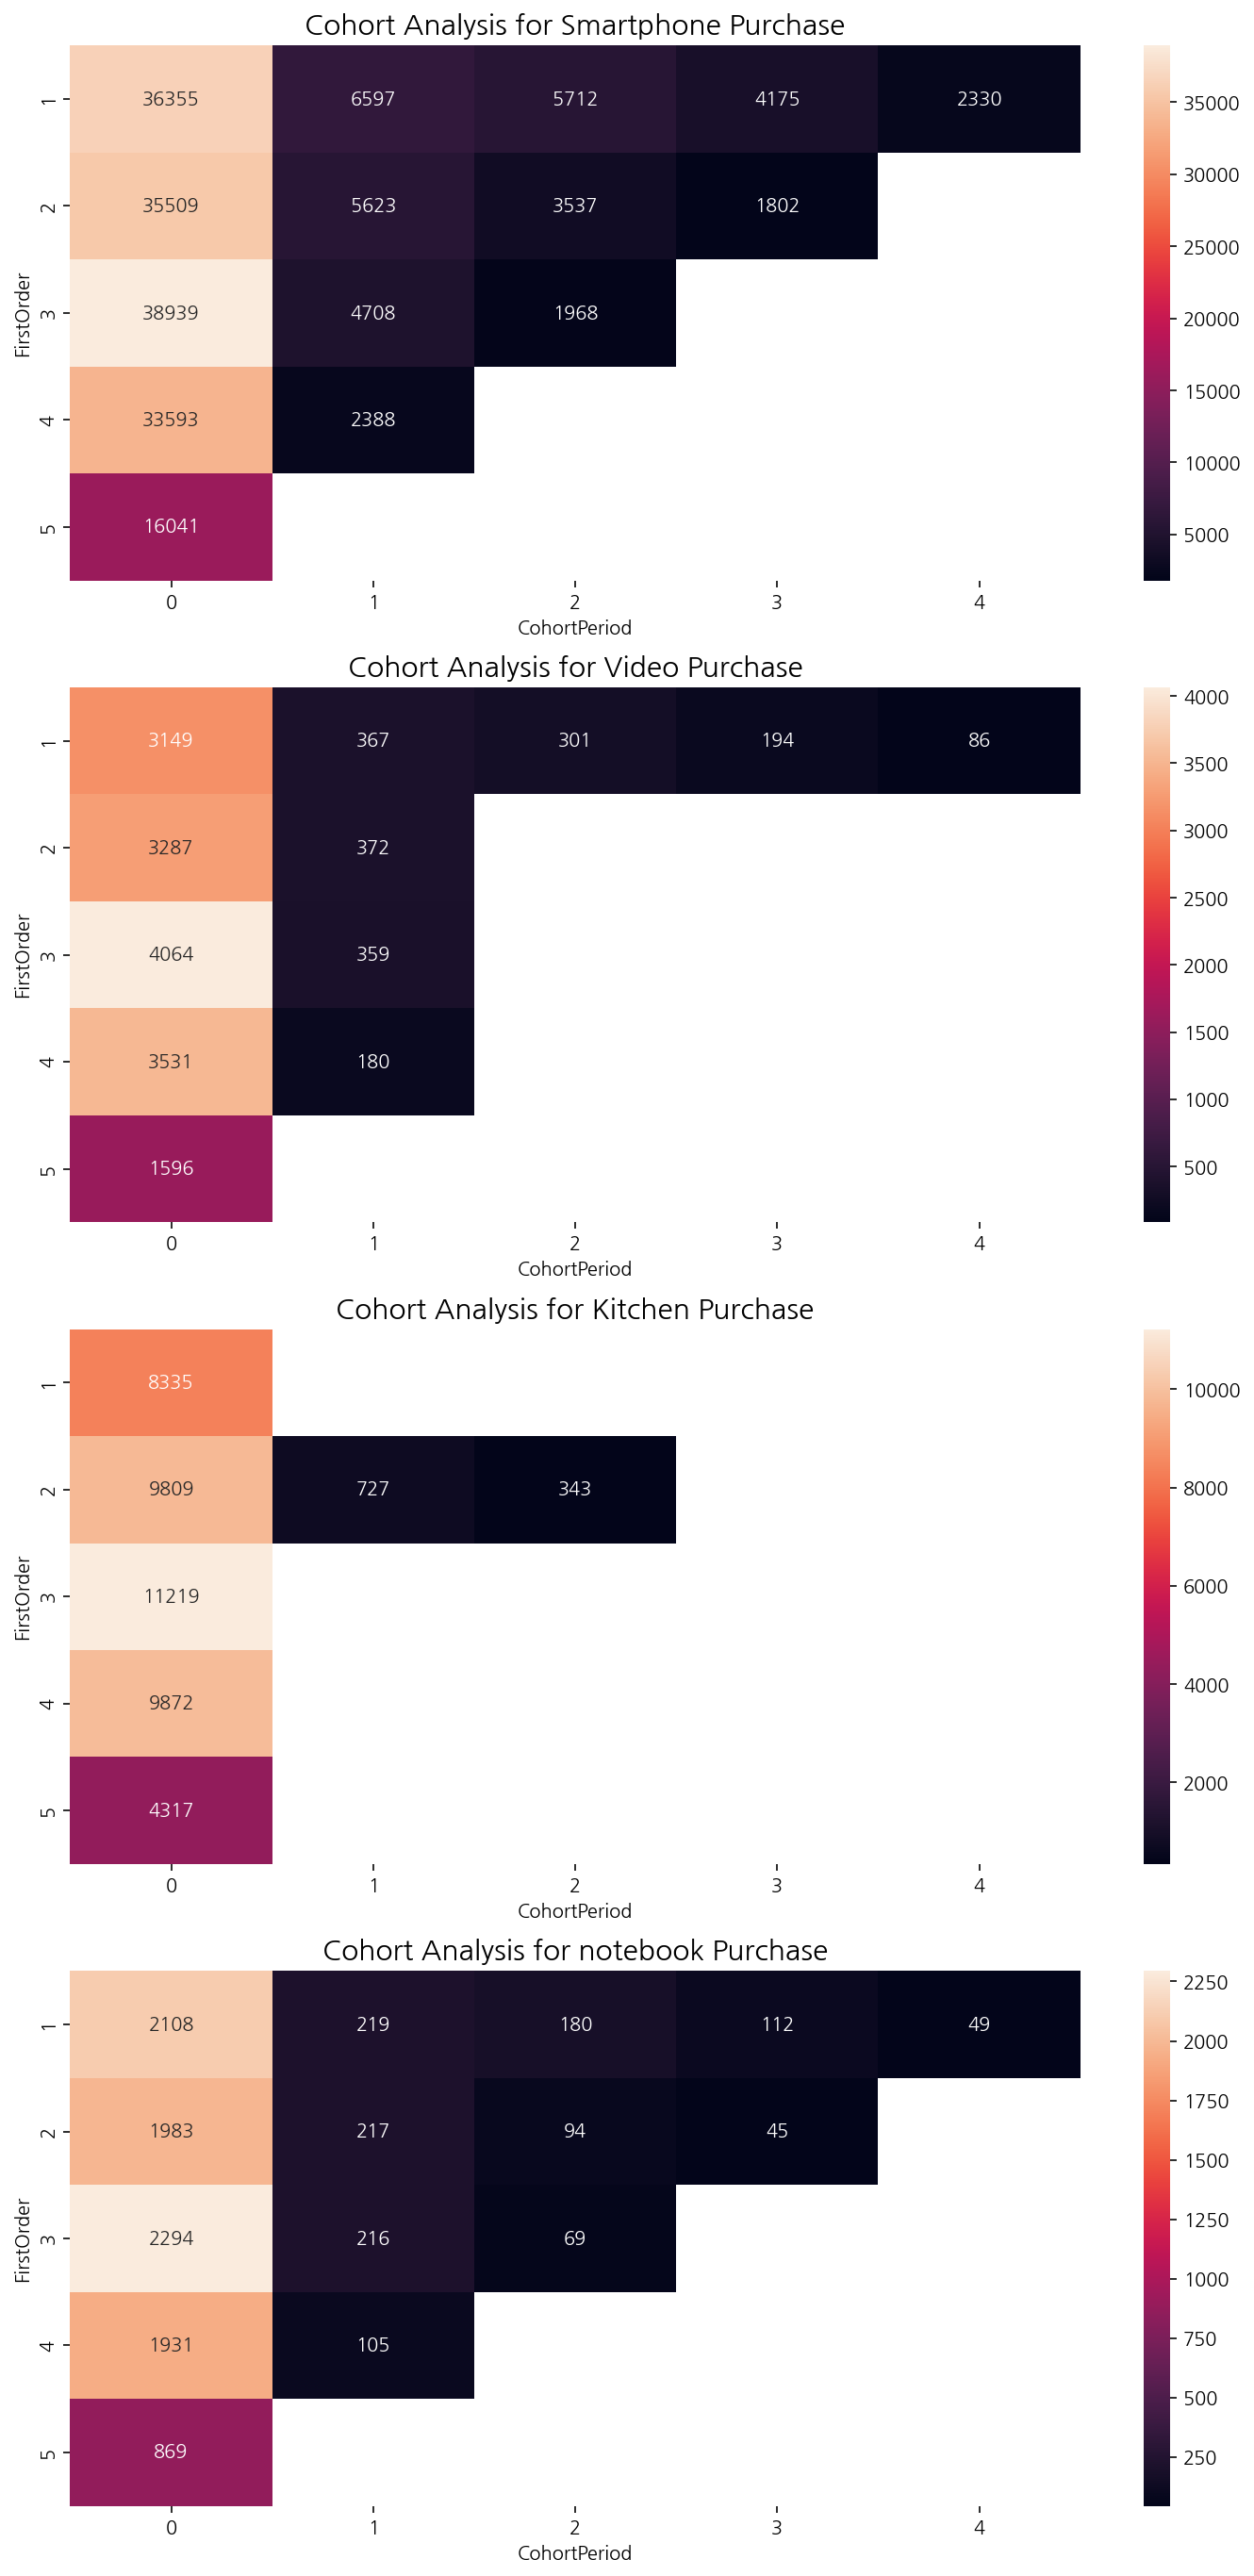

In [60]:
# smartphone, video, kitchen, notebook 코호트 분석 시각화
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))

phone_cnt = sns.heatmap(smartphone_cnt, annot=True, fmt=".0f", ax=ax[0])
phone_cnt.set_title("Cohort Analysis for Smartphone Purchase", fontsize=15)

video_cnt = sns.heatmap(video_cnt, annot=True, fmt=".0f", ax=ax[1])
video_cnt.set_title("Cohort Analysis for Video Purchase", fontsize=15)

kitchen_cnt = sns.heatmap(kitchen_cnt, annot=True, fmt=".0f", ax=ax[2])
kitchen_cnt.set_title("Cohort Analysis for Kitchen Purchase", fontsize=15)

notebook_cnt = sns.heatmap(notebook_cnt, annot=True, fmt=".0f", ax=ax[3])
notebook_cnt.set_title("Cohort Analysis for notebook Purchase", fontsize=15)

plt.show()

##### 코호트 분석 정리  

1. Funnel 분석을 통해 주요 이탈이 발생하는 구간 (view -> cart)을 기준으로 잡음
2. view가 cart로 이어지는 확률이 높은 카테고리 (중분류) 중, 매출이 높은 순서대로 정렬
    - smartphone, video (주로 tv), kitchen, notebook
3. 코호트 분석의 결과, 해당 카테고리들은 고관여 제품의 특징 갖는다
    - 관여도
        - 소비자 행동 분석하는 분야에서 쓰는 용어
        - 특정 상황에서 소비자가 관심 갖는 강도, 흥미의 정도, 개인적인 중요도의 정도
    - 고관여 제품 : 관심이나 흥미 중요도 높게 생각하는 상품, 서비스
    - 고관여 제품 특징
        - 쇼핑시 필요로 하는 정보의 양은 많은편이며, 구매빈도는 낮다. 
        - 상품 단가는 높고 주요 상품군은 생필품 같이 20만원 이상의 전문 상품군
        - 구매 행위는 검색과 비교를 통한 계획 구매의 특징
            - 본인의 욕구, 취향, 경제 사정, 기능 등 다양한 요소 비교하고 분석한다
        - 이성적 기능 강조하거나 심미적이고 감성적인 부분 강조    
    - 출처
        - http://www.asiaa.co.kr/news/articleView.html?idxno=43969
        - http://www.ccdailynews.com/news/articleView.html?idxno=2026178
